<a href="https://colab.research.google.com/github/jonathanahc/Proyecto/blob/main/ProyectoProgADAP_255497NvaVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto de Programación para Analítica Descriptiva y Predictiva**
## Nombre del Proyecto: Consumo y Costo del Agua en Nueva York
## Grupo: A
## Autor: Jonathan Adrian Herrera Castro
## Matrícula: 255497
## Fecha: 08/03/2025

# **1. Introducción**



**- Descripción del problema:** el objetivo de este análisis es examinar el consumo de agua en la ciudad de Nueva York y su costo asociado, con el fin de identificar tendencias y algunos factores que influyen en su variación. Se analizarán patrones de consumo en distintas zonas y sectores de febrero del 2013 hasta 2023.

**- Objetivo del análisis:** comprender el consumo y costo del agua en Nueva York para identificar patrones y factores que afectan su variabilidad. Este análisis tiene como impacto en el tema de la optimización el uso del agua, la planificación de tarifas y establecer algunas estrategias de sostenibilidad.

**- Fuente de datos:** los datos utilizados en este análisis provienen de NYC Open Data, una plataforma que ofrece bases de datos de acceso público. La información fue proporcionada por la Autoridad de Vivienda de la Ciudad de Nueva York (NYCHA, por sus siglas en inglés).

# **2. Información General del Conjunto de Datos**

El conjunto de datos sobre el consumo y costo del agua en Nueva York pertenece a la categoría de gestión de recursos hídricos urbanos, que abarca el análisis y control de la distribución de agua potable y la fijación de tarifas. Los datos recopilados incluyen información sobre el volumen de agua consumido en diferentes áreas de la ciudad, las tarifas establecidas para los consumidores, patrones de consumo y variaciones de precios. La fuente principal de estos datos es la Autoridad de Vivienda de la Ciudad de Nueva York (NYCHA, por sus siglas en inglés), los informes y los datos sobre el consumo de agua se publican anualmente y están disponibles al público en su sitio web oficial.

El enlace para acceder a la base de datos es:
[Water Consumption And Cost (2013 - Feb 2025)](https://data.cityofnewyork.us/Housing-Development/Water-Consumption-And-Cost-2013-Feb-2025-/66be-66yr/about_data)

Estos datos se pueden encontrar en formato CSV lo cual facilita su acceso y análisis y son utilizados para diversos fines como el análisis - planificación de políticas públicas, gestión - mantenimiento de infraestructura y para pronósticos y ajustes tarifarios.

#**3. Descripción del Conjunto de Datos**


Como primera fase, se emplearon diversas librerías para facilitar el proceso de carga del archivo CSV. La primera librería utilizada fue google.colab, la cual establece la conexión a la carpeta Drive donde se encuentra almacenado el archivo. Además, se importaron las librerías Pandas y Re para interactuar con los datos.

In [26]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import matplotlib.dates as mdates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Con esta sentencia, se cargó el archivo CSV en un dataframe sin presentar inconvenientes durante el proceso.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ProyectoProgramacion/Water_Consumption_And_Cost__2013_-_Feb_2023__20250216.csv', engine="python")

Una vez cargado el archivo, se validó que los datos se mostrarán correctamente.

In [ ]:
df.head(3)

Development Name   Borough   Account Name Location Meter AMR Meter Scope  \
0    HOWARD AVENUE  BROOKLYN  HOWARD AVENUE   BLD 02       AMR         NaN   
1     BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09       AMR      BLD 09   
2     BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09       AMR      BLD 09   

   TDS #  EDP  RC Code Funding Source  ... Service End Date # days  \
0  339.0  782  K033900        FEDERAL  ...       04/23/2020   31.0   
1   91.0  240  Q009100        FEDERAL  ...       01/26/2020   34.0   
2   91.0  240  Q009100        FEDERAL  ...       02/24/2020   29.0   

   Meter Number Estimated Current Charges             Rate Class  \
0     E11310572         N         2945.22  Basic Water and Sewer   
1     K13060723         N          196.35  Basic Water and Sewer   
2     K13060723         N          258.35  Basic Water and Sewer   

   Bill Analyzed Consumption (HCF) Water&Sewer Charges  Other Charges  
0            Yes               285             2945.22            0.0  
1            Yes                19              196.35            0.0  
2            Yes                25              258.35            0.0  

[3 rows x 25 columns]

Utilizando la función Shape, se realizó un conteo del número de filas y columnas del dataframe.

In [ ]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 50315, Columnas: 25


Después del conteo, se utilizó la función Info con la cual se obtuvó la información sobre las columnas, incluyendo el nombre y el tipo de dato de cada una.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50315 entries, 0 to 50314
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Development Name     50255 non-null  object 
 1   Borough              50315 non-null  object 
 2   Account Name         50315 non-null  object 
 3   Location             49487 non-null  object 
 4   Meter AMR            49805 non-null  object 
 5   Meter Scope          12782 non-null  object 
 6   TDS #                50255 non-null  float64
 7   EDP                  50315 non-null  int64  
 8   RC Code              50315 non-null  object 
 9   Funding Source       50239 non-null  object 
 10  AMP #                50193 non-null  object 
 11  Vendor Name          50315 non-null  object 
 12  UMIS BILL ID         50315 non-null  int64  
 13  Revenue Month        50315 non-null  object 
 14  Service Start Date   50308 non-null  object 
 15  Service End Date     50308 non-null 

Con la función Describe se proporcionó un resumen estadístico de cada columna.

In [ ]:
df.describe(include='all')

Development Name Borough  \
count                              50255   50315   
unique                               110       7   
top     FHA REPOSSESSED HOUSES (GROUP V)     FHA   
freq                                4765   23460   
mean                                 NaN     NaN   
std                                  NaN     NaN   
min                                  NaN     NaN   
25%                                  NaN     NaN   
50%                                  NaN     NaN   
75%                                  NaN     NaN   
max                                  NaN     NaN   

                            Account Name Location Meter AMR       Meter Scope  \
count                              50315    49487     49805             12782   
unique                               117      305         3                59   
top     FHA REPOSSESSED HOUSES (GROUP V)   BLD 01       AMR  Community Center   
freq                                4759     4459     43782              1228   
mean                                 NaN      NaN       NaN               NaN   
std                                  NaN      NaN       NaN               NaN   
min                                  NaN      NaN       NaN               NaN   
25%                                  NaN      NaN       NaN               NaN   
50%                                  NaN      NaN       NaN               NaN   
75%                                  NaN      NaN       NaN               NaN   
max                                  NaN      NaN       NaN               NaN   

               TDS #           EDP  RC Code Funding Source  ...  \
count   50255.000000  50315.000000    50315          50239  ...   
unique           NaN           NaN      114              6  ...   
top              NaN           NaN  Q026000        FEDERAL  ...   
freq             NaN           NaN     4765          45346  ...   
mean      258.871794    463.205764      NaN            NaN  ...   
std       101.467018    185.109210      NaN            NaN  ...   
min         1.000000    200.000000      NaN            NaN  ...   
25%       209.000000    325.000000      NaN            NaN  ...   
50%       273.000000    396.000000      NaN            NaN  ...   
75%       338.000000    637.000000      NaN            NaN  ...   
max       559.000000    999.000000      NaN            NaN  ...   

       Service End Date        # days  Meter Number Estimated Current Charges  \
count             50308  50308.000000         50315     50315    50315.000000   
unique             1114           NaN           795         2             NaN   
top          03/24/2019           NaN    UN-METERED         N             NaN   
freq                594           NaN           179     41499             NaN   
mean                NaN     33.182953           NaN       NaN     2150.221066   
std                 NaN     53.181840           NaN       NaN     5623.852543   
min                 NaN   -335.000000           NaN       NaN    -1748.510000   
25%                 NaN     29.000000           NaN       NaN       46.460000   
50%                 NaN     30.000000           NaN       NaN      197.360000   
75%                 NaN     32.000000           NaN       NaN     2598.415000   
max                 NaN   6968.000000           NaN       NaN   392036.460000   

                   Rate Class  Bill Analyzed Consumption (HCF)  \
count                   50279          50315      50315.000000   
unique                      5              2               NaN   
top     Basic Water and Sewer            Yes               NaN   
freq                    50175          49235               NaN   
mean                      NaN            NaN        224.291066   
std                       NaN            NaN       2020.962056   
min                       NaN            NaN          0.000000   
25%                       NaN            NaN          5.000000   
50%                       NaN            NaN         2

# **4. Limpieza y Transformación del Conjunto de Datos**


Antes de proceder con la limpieza y transformación de los datos, se llevó a cabo un análisis detallado de las columnas del dataframe, basado en las estadísticas previamente calculadas. Este análisis tuvo como objetivo identificar variables irrelevantes y caracterizar la distribución de los datos para optimizar su tratamiento en las siguientes etapas del proceso.

Con base en este análisis, se determinó que las columnas Meter AMR, Meter Scope, EDP, Funding Source, AMP #, Vendor Name, Estimated y Bill Analyzed serían eliminadas, ya que no aportaban un valor significativo al análisis del dataframe y presentaban una baja variabilidad en la distribución de los datos.

A continuación, se presentan las gráficas que ilustran la distribución de los datos de las columnas eliminadas.

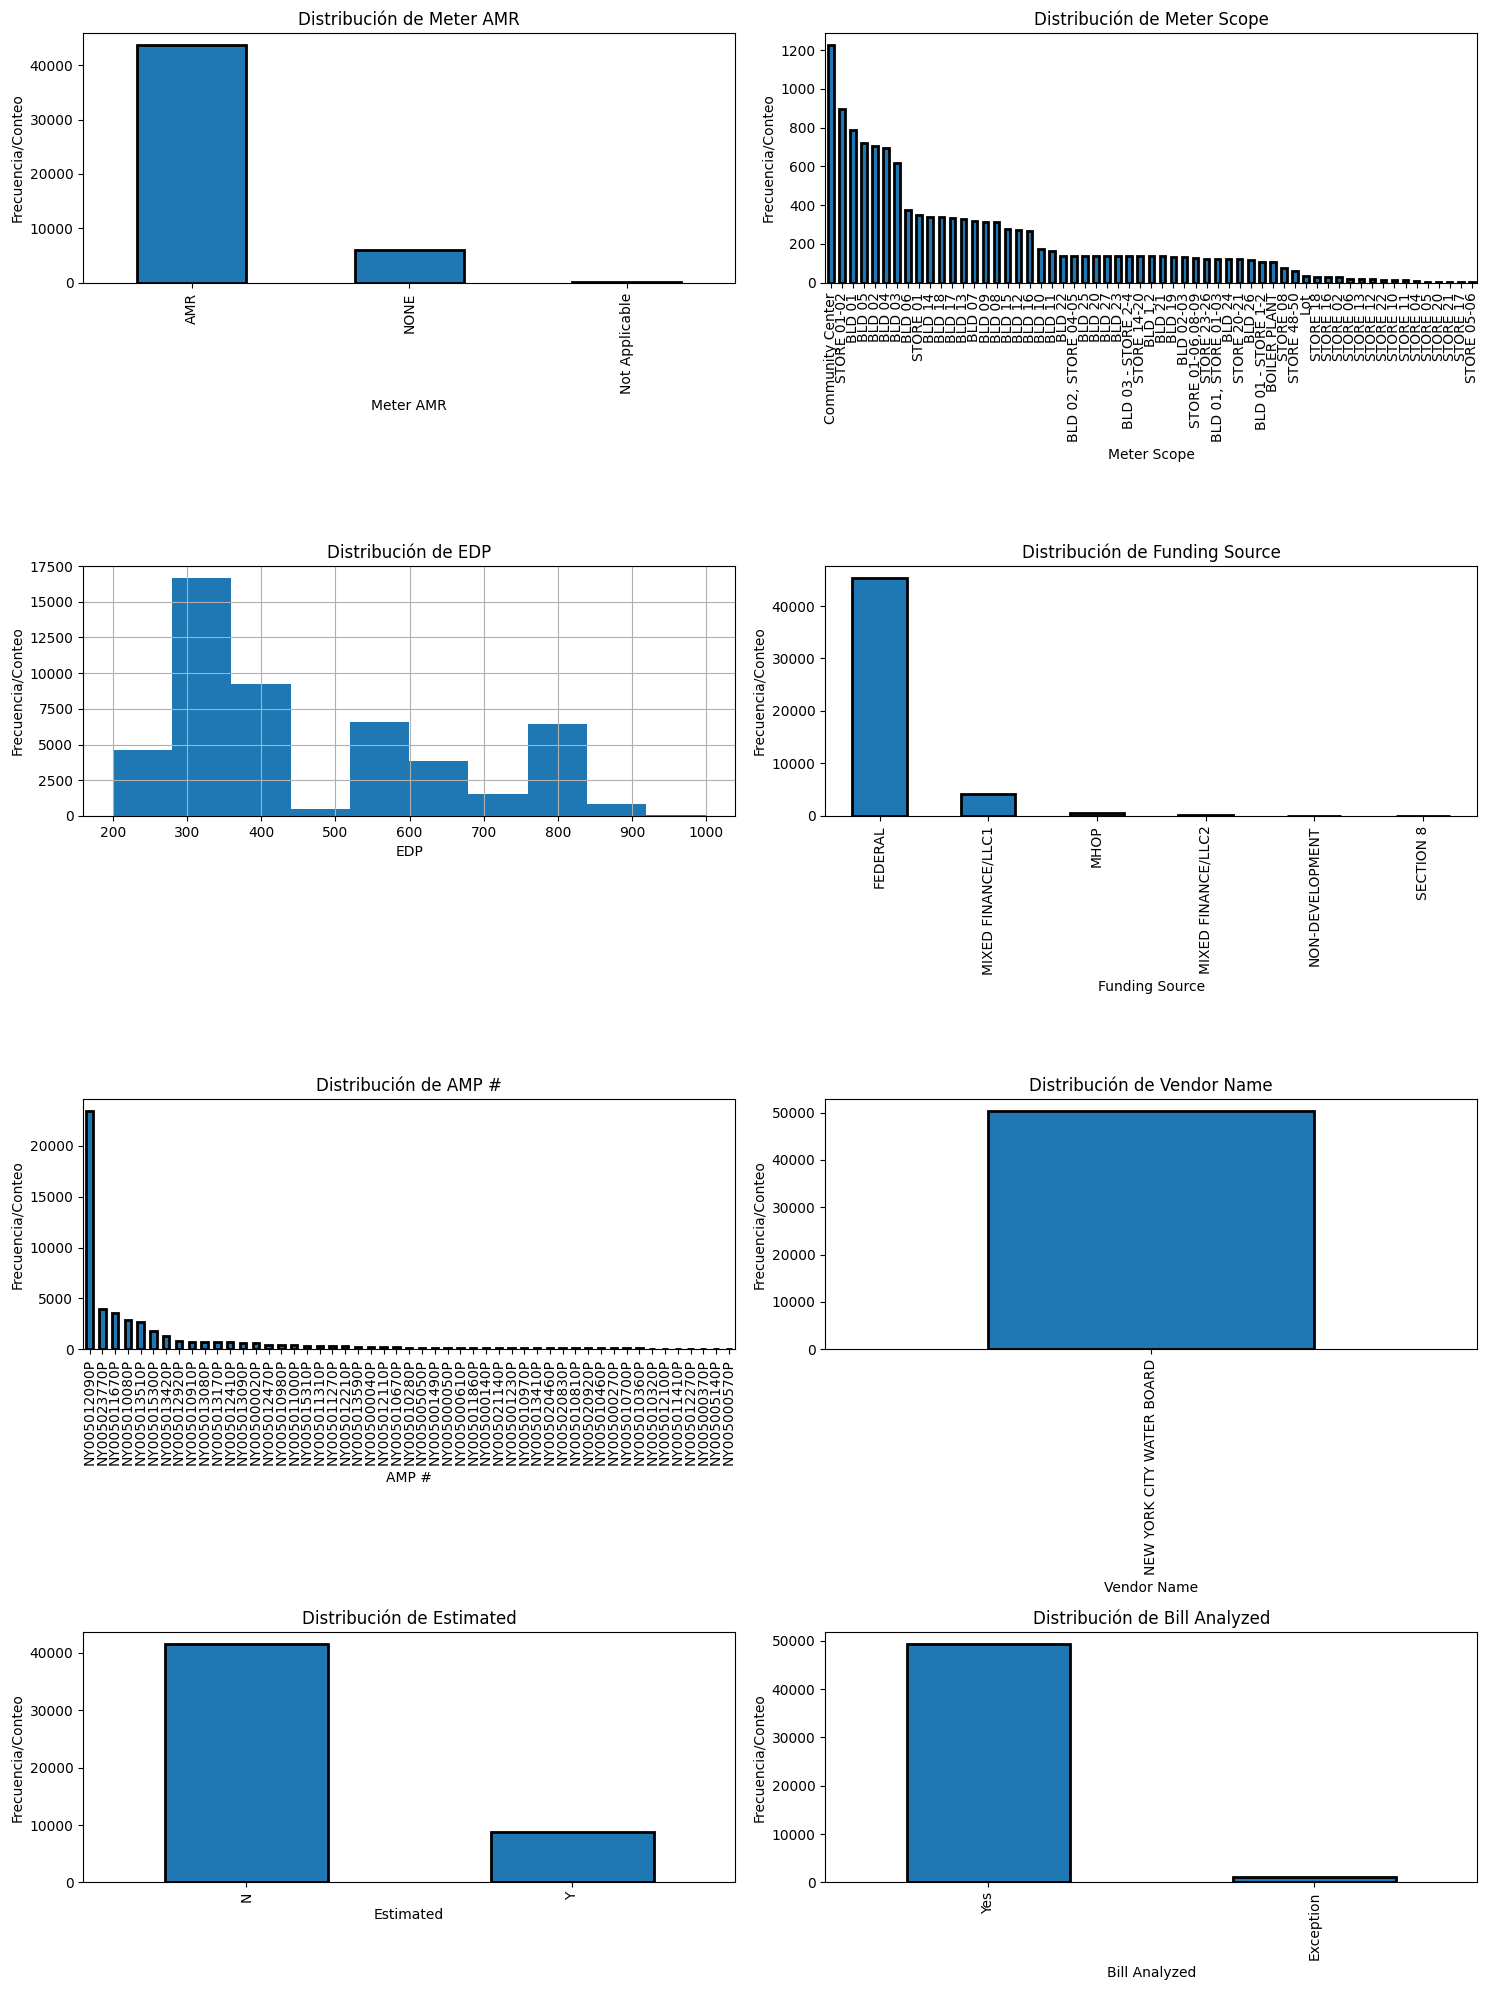

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.ravel()


columns_to_plot = ['Meter AMR', 'Meter Scope', 'EDP', 'Funding Source', 'AMP #', 'Vendor Name', 'Estimated', 'Bill Analyzed']

for i, col in enumerate(columns_to_plot):
    try:
        if col in df.columns:
          if df[col].dtype == 'object':
              df[col].value_counts().plot(kind='bar', ax=axes[i], width=0.5, linewidth=2.0, edgecolor='black')
          else:
              df[col].hist(ax=axes[i])
          axes[i].set_title(f'Distribución de {col}')
          axes[i].set_xlabel(col)
          axes[i].set_ylabel('Frecuencia/Conteo')
        else:
          axes[i].set_title(f"Column '{col}' no encontrada en Dataframe")

    except Exception as e:
        axes[i].set_title(f"Error al trazar {col}: {e}")

plt.tight_layout()
plt.show()


A continuación se muestra el código para eliminación de las columnas.

In [ ]:
df = df.drop(columns=['Meter AMR', 'Meter Scope', 'EDP', 'Funding Source', 'AMP #', 'Vendor Name', 'Estimated', 'Bill Analyzed'])

###***Normalización de Nombres de Columnas***

Como primer paso en el proceso de normalización, se presentó una visión general de todas las columnas del DataFrame.

In [ ]:
df.columns

Index(['Development Name', 'Borough', 'Account Name', 'Location', 'TDS #',
       'RC Code', 'UMIS BILL ID', 'Revenue Month', 'Service Start Date',
       'Service End Date', '# days', 'Meter Number', 'Current Charges',
       'Rate Class', 'Consumption (HCF)', 'Water&Sewer Charges',
       'Other Charges'],
      dtype='object')

A continuación, se identificaron las columnas que contenían caracteres especiales o espacios en blanco mediante una expresión regular.

In [ ]:
for col in df.columns:
    if re.search(r'[^\w\s]', col) or re.search(r'\s', col):
      print(col)

Development Name
Account Name
TDS #
RC Code
UMIS BILL ID
Revenue Month
Service Start Date
Service End Date
# days
Meter Number
Current Charges
Rate Class
Consumption (HCF)
Water&Sewer Charges
Other Charges


Tras identificar las columnas, se procedió a su normalización mediante una expresión regular, lo que realizar esta expresión es reemplazar todos los caracteres que no sean alfanuméricos por una cadena vacía. Además, se aplicó la función lower() para convertir todos los nombres de las columnas a minúsculas.

In [ ]:
df.columns = df.columns.str.lower().str.replace(r"\W+", "", regex=True)

Una vez completada la normalización, se verificaron los nombres de todas las columnas.

In [ ]:
df.columns

Index(['developmentname', 'borough', 'accountname', 'location', 'tds',
       'rccode', 'umisbillid', 'revenuemonth', 'servicestartdate',
       'serviceenddate', 'days', 'meternumber', 'currentcharges', 'rateclass',
       'consumptionhcf', 'watersewercharges', 'othercharges'],
      dtype='object')

###***Limpieza, Transformación y Normalización de Datos Temporales***

En esta sección, se trabajó con los datos temporales. Primero, la columna revenuemonth se convirtió al tipo Datetime, respetando el mismo formato presente en el archivo CSV.

In [ ]:
df['revenuemonth'] = pd.to_datetime(df['revenuemonth'], format='%Y-%m')

A continuación, las columnas servicestartdate y serviceenddate se convirtieron al tipo Datetime, respetando el formato del archivo CSV.

Además, se implementó una estrategia para manejar los valores nulos, la cual consistió en reemplazarlos por NaT, ya que no se observa una secuencia en los valores de dichas columnas.

In [ ]:
df['servicestartdate'] = pd.to_datetime(df['servicestartdate'], format='%m/%d/%Y', errors="coerce")
df['serviceenddate'] = pd.to_datetime(df['serviceenddate'], format='%m/%d/%Y', errors="coerce")

Por último, se verificó el nuevo tipo de datos en las columnas.

In [ ]:
df[['revenuemonth', 'servicestartdate', 'serviceenddate']].dtypes

revenuemonth        datetime64[ns]
servicestartdate    datetime64[ns]
serviceenddate      datetime64[ns]
dtype: object

###***Corrección de Tipos de Datos y Manejo de Datos Perdidos***

Para el proceso de corrección de tipos de datos, primero se presentó una visión general del tipo de dato en cada columna.

In [ ]:
df.dtypes

developmentname              object
borough                      object
accountname                  object
location                     object
tds                         float64
rccode                       object
umisbillid                    int64
revenuemonth         datetime64[ns]
servicestartdate     datetime64[ns]
serviceenddate       datetime64[ns]
days                        float64
meternumber                  object
currentcharges              float64
rateclass                    object
consumptionhcf                int64
watersewercharges           float64
othercharges                float64
dtype: object

Además de verificar el tipo de cada columna, se comprobó la presencia de datos perdidos en ellas.

In [ ]:
df.isnull().sum()

developmentname       60
borough                0
accountname            0
location             828
tds                   60
rccode                 0
umisbillid             0
revenuemonth           0
servicestartdate       7
serviceenddate         7
days                   7
meternumber            0
currentcharges         0
rateclass             36
consumptionhcf         0
watersewercharges      0
othercharges           0
dtype: int64

Además, se llevó a cabo una revisión del uso de memoria de cada columna.

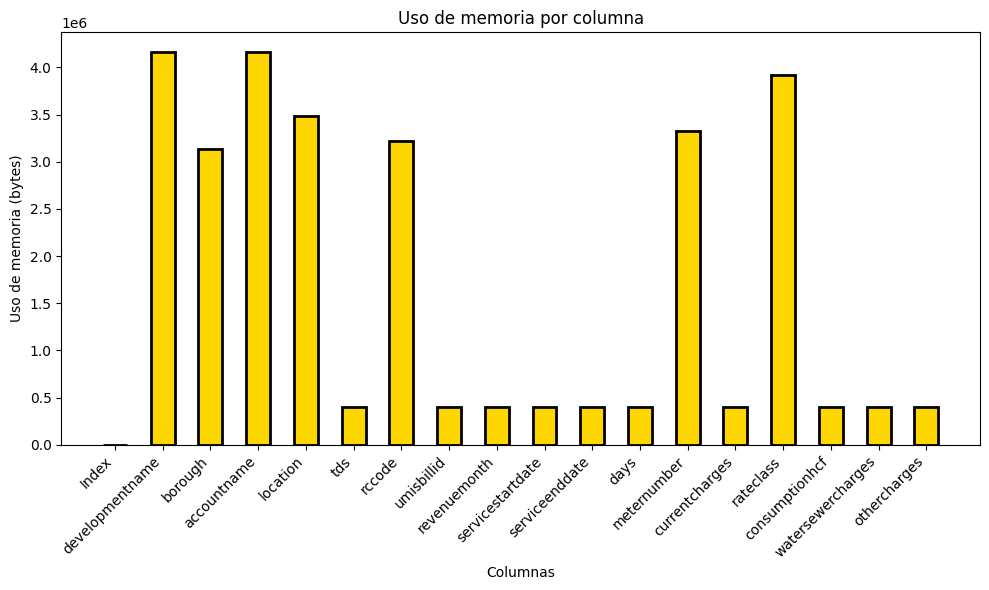

In [ ]:
memory_usage = df.memory_usage(deep=True)

plt.figure(figsize=(10, 6))
plt.bar(memory_usage.index, memory_usage.values, color='gold', width=0.5, linewidth=2.0, edgecolor='black')
plt.xlabel("Columnas")
plt.ylabel("Uso de memoria (bytes)")
plt.title("Uso de memoria por columna")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Después de revisar los valores nulos y tipo de dato se procedió con la corrección de los tipos de datos. Primero, las columnas tds y days fueron convertidas a tipo Int, ya que contienen únicamente valores enteros.

Para los valores nulos, se aplicó la estrategia de interpolación, dado que los datos siguen una secuencia lógica, lo que permite estimar los valores faltantes en función de sus vecinos.

In [ ]:
df['tds'] = df['tds'].interpolate().astype(int)
df['days'] = df['days'].interpolate().astype(int)

Las columnas rccode y meternumber fueron convertidas al tipo Str.


In [ ]:
df['rccode'] = df['rccode'].astype(str)
df['meternumber'] = df['meternumber'].astype(str)

Finalmente, las columnas restantes de tipo object fueron convertidas a category para optimizar el uso de memoria.

En cuanto a los valores nulos, se aplicó la estrategia de imputación por moda, ya que cada columna contenía un término recurrente, considerado el valor más probable para reemplazar los datos perdidos.

In [ ]:
columnas = df.select_dtypes(include=['object']).columns

for col in columnas:
    moda = df[col].mode()[0]
    df[col] = df[col].fillna(moda).astype('category')

Como parte del proceso de limpieza, se llevó a cabo una verificación de las columnas de tipo numérico con el objetivo de validar la integridad de los datos y detectar posibles discrepancias.

In [ ]:
print(df[df['tds'] < 0]['tds'].value_counts())
print("\n")
print(df[df['umisbillid'] < 0]['umisbillid'].value_counts())
print("\n")
print(df[df['days'] < 0]['days'].value_counts())
print("\n")
print(df[df['currentcharges'] < 0]['currentcharges'].value_counts())
print("\n")
print(df[df['consumptionhcf'] < 0]['consumptionhcf'].value_counts())
print("\n")
print(df[df['watersewercharges'] < 0]['watersewercharges'].value_counts())
print("\n")
print(df[df['othercharges'] < 0]['othercharges'].value_counts())


Series([], Name: count, dtype: int64)


Series([], Name: count, dtype: int64)


days
-335    6
-57     1
Name: count, dtype: int64


currentcharges
-44.55      1
-15.21      1
-1390.99    1
-1748.51    1
Name: count, dtype: int64


Series([], Name: count, dtype: int64)


Series([], Name: count, dtype: int64)


othercharges
-10.00       98
-40.09        1
-48.82        1
-28.95        1
-60.88        1
-1194.02      1
-8614.29      1
-9838.30      1
-1272.96      1
-5744.85      1
-1519.66      1
-15049.09     1
-1700.19      1
-76.48        1
-0.55         1
-1.60         1
-59.21        1
-0.02         1
-5723.38      1
-67726.83     1
-937.44       1
-2.05         1
-1082.80      1
-1737.52      1
-3866.51      1
-5000.00      1
-1188.29      1
-326.45       1
-126.67       1
-38.49        1
-253.32       1
-2684.02      1
-36.80        1
-11.80        1
-54.55        1
-133.64       1
-5.15         1
-4.85         1
-4.46         1
-5.54         1
-12.45        1
-10901.99     1
-55

Con base en los resultados obtenidos, se identificó la presencia de valores negativos en las columnas days, currentcharges y othercharges, los cuales podrían ser outliers y afectar el rendimiento de los modelos predictivos. Por esta razón, se procedió a la eliminación específica de los registros que contenían estos valores.

In [ ]:
df.drop(df[df['days'] < 0].index, inplace=True)
df.drop(df[df['currentcharges'] < 0].index, inplace=True)
df.drop(df[df['othercharges'] < 0].index, inplace=True)

Después de haber realizado el proceso de la corrección y limpieza, se verificó el nuevo tipo de dato en las columnas.

In [ ]:
df.dtypes

developmentname            category
borough                    category
accountname                category
location                   category
tds                           int64
rccode                     category
umisbillid                    int64
revenuemonth         datetime64[ns]
servicestartdate     datetime64[ns]
serviceenddate       datetime64[ns]
days                          int64
meternumber                category
currentcharges              float64
rateclass                  category
consumptionhcf                int64
watersewercharges           float64
othercharges                float64
dtype: object

Además, se realizó una nueva validación de los valores nulos.

Cabe destacar que en las columnas servicestartdate y serviceenddate, los valores nulos se representan como NaT.

In [ ]:
df.isnull().sum()

developmentname      0
borough              0
accountname          0
location             0
tds                  0
rccode               0
umisbillid           0
revenuemonth         0
servicestartdate     7
serviceenddate       7
days                 0
meternumber          0
currentcharges       0
rateclass            0
consumptionhcf       0
watersewercharges    0
othercharges         0
dtype: int64

Además, se llevó a cabo una evaluación del uso de memoria con los tipos de datos modificados en las columnas.

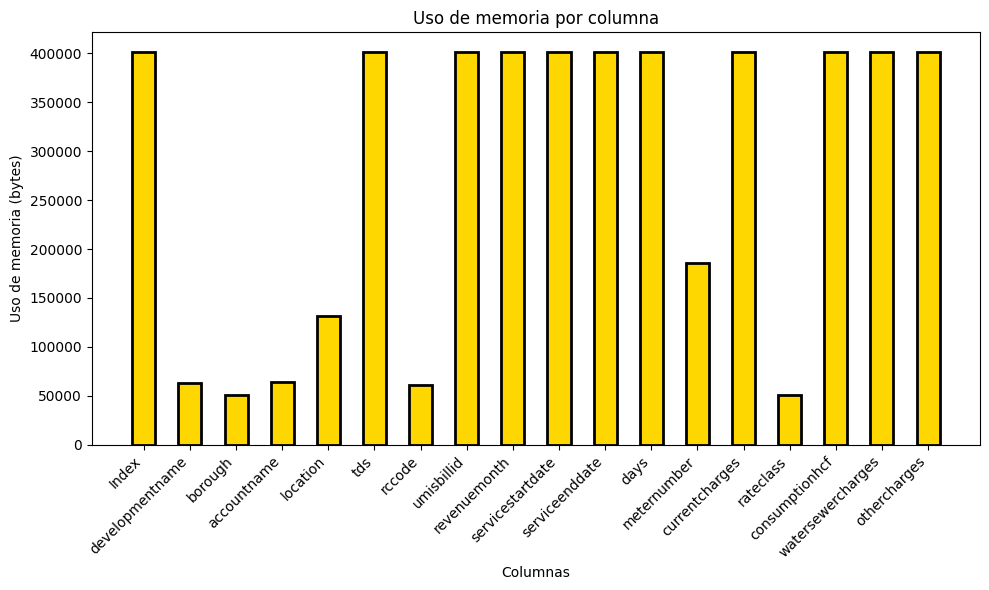

In [ ]:
memory_usage = df.memory_usage(deep=True)

plt.figure(figsize=(10, 6))
plt.bar(memory_usage.index, memory_usage.values, color='gold', width=0.5, linewidth=2.0, edgecolor='black')
plt.xlabel("Columnas")
plt.ylabel("Uso de memoria (bytes)")
plt.title("Uso de memoria por columna")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Así quedó el DataFrame con los cambios realizados.

In [ ]:
df.head()

developmentname   borough    accountname location  tds   rccode  umisbillid  \
0   HOWARD AVENUE  BROOKLYN  HOWARD AVENUE   BLD 02  339  K033900     8870656   
1    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8562430   
2    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8667039   
3    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8759719   
4    BAISLEY PARK    QUEENS   BAISLEY PARK   BLD 09   91  Q009100     8870760   

  revenuemonth servicestartdate serviceenddate  days meternumber  \
0   2020-04-01       2020-03-23     2020-04-23    31   E11310572   
1   2020-01-01       2019-12-23     2020-01-26    34   K13060723   
2   2020-02-01       2020-01-26     2020-02-24    29   K13060723   
3   2020-03-01       2020-02-24     2020-03-23    28   K13060723   
4   2020-04-01       2020-03-23     2020-04-23    31   K13060723   

   currentcharges              rateclass  consumptionhcf  watersewercharges  \
0         2945.22  Basic Water and Sewer             285            2945.22   
1          196.35  Basic Water and Sewer              19             196.35   
2          258.35  Basic Water and Sewer              25             258.35   
3          217.02  Basic Water and Sewer              21             217.02   
4          103.34  Basic Water and Sewer              10             103.34   

   othercharges  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0

In [ ]:
df.describe(include='all')

developmentname borough  \
count                              50155   50155   
unique                               110       7   
top     FHA REPOSSESSED HOUSES (GROUP V)     FHA   
freq                                4807   23409   
mean                                 NaN     NaN   
min                                  NaN     NaN   
25%                                  NaN     NaN   
50%                                  NaN     NaN   
75%                                  NaN     NaN   
max                                  NaN     NaN   
std                                  NaN     NaN   

                             accountname location           tds   rccode  \
count                              50155    50155  50155.000000    50155   
unique                               117      305           NaN      114   
top     FHA REPOSSESSED HOUSES (GROUP V)   BLD 01           NaN  Q026000   
freq                                4741     5259           NaN     4747   
mean                                 NaN      NaN    258.691437      NaN   
min                                  NaN      NaN      1.000000      NaN   
25%                                  NaN      NaN    209.000000      NaN   
50%                                  NaN      NaN    273.000000      NaN   
75%                                  NaN      NaN    338.000000      NaN   
max                                  NaN      NaN    559.000000      NaN   
std                                  NaN      NaN    101.519212      NaN   

          umisbillid                   revenuemonth  \
count   5.015500e+04                          50155   
unique           NaN                            NaN   
top              NaN                            NaN   
freq             NaN                            NaN   
mean    6.584326e+06  2017-10-12 22:50:13.936795904   
min     2.576038e+06            2013-01-01 00:00:00   
25%     4.132341e+06            2015-04-01 00:00:00   
50%     6.353682e+06            2017-11-01 00:00:00   
75%     8.562616e+06            2020-01-01 00:00:00   
max     1.217584e+07            2023-01-01 00:00:00   
std     2.661534e+06                            NaN   

                     servicestartdate                 serviceenddate  \
count                           50148                          50148   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2017-10-01 04:17:48.198133504  2017-11-03 08:43:21.579325184   
min               2002-12-22 00:00:00            2013-01-14 00:00:00   
25%               2015-03-22 00:00:00            2015-04-21 00:00:00   
50%               2017-10-22 00:00:00            2017-11-23 00:00:00   
75%               2019-12-23 00:00:00            2020-01-26 00:00:00   
max               2022-12-29 00:00:00            2023-01-27 00:00:00   
std                               NaN                            NaN   

                days meternumber  currentcharges              rateclass  \
count   50155.000000       50155    50155.000000                  50155   
unique           NaN         794             NaN                      5   
top              NaN  UN-METERED             NaN  Basic Water and Sewer   
freq             NaN         179             NaN                  50051   
mean       33.201595         NaN     2143.459285                    NaN   
min         0.000000         NaN        0.000000                    NaN   
25%        29.000000         NaN       46.460000                    NaN   
50%        30.000000         NaN      197.360000                    NaN   
75%        32.000000         NaN     2595.260000                    NaN   
max      6968.000000         NaN   392036.460000                    NaN   
std        53.115153         NaN     5600.139052                    NaN   

        consumptionhcf  watersewercharges  othercharges  
co

El número total de filas y columnas es.

In [ ]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 50155, Columnas: 17


###***Limpieza, Transformación y Normalización de Datos Categóricos***

Para este proceso de limpieza y transformación, se verificó primero el número de valores únicos en cada una de las columnas de tipo Category.

In [ ]:
for col in ['developmentname', 'borough', 'accountname', 'location', 'rateclass']:
    print(f"Valores únicos en {col}: {df[col].value_counts()}")
    print("\n")

Valores únicos en developmentname: developmentname
FHA REPOSSESSED HOUSES (GROUP V)            4807
SAMUEL (CITY)                               3914
FHA REPOSSESSED HOUSES (GROUP I)            3730
FHA REPOSSESSED HOUSES (GROUP X)            3031
SOUTH JAMAICA II                            2600
                                            ... 
EDENWALD                                      11
BRYANT AVENUE-EAST 174TH STREET                9
EAST 152ND STREET-COURTLANDT AVENUE            9
WEST TREMONT AVENUE-SEDGWICK AVENUE AREA       6
FIRST HOUSES                                   1
Name: count, Length: 110, dtype: int64


Valores únicos en borough: borough
FHA                         23409
BROOKLYN                     9040
MANHATTAN                    8162
BRONX                        4883
QUEENS                       4468
STATEN ISLAND                 133
NON DEVELOPMENT FACILITY       60
Name: count, dtype: int64


Valores únicos en accountname: accountname
FHA REPOSSESSED HOUSES (G

Tras la verificación, se procedió a renombrar algunos datos. En este caso, se cambió 'Basic Water and Sewer' en la columna rateclass.

In [ ]:
df['rateclass'] = df['rateclass'].replace({'Basic Water and Sewer':'BASIC WATER AND SEWER'})

<ipython-input-374-89d0124375b6>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['rateclass'] = df['rateclass'].replace({'Basic Water and Sewer':'BASIC WATER AND SEWER'})


Se volvió a verificar los valores únicos.

In [ ]:
print(df['rateclass'].unique())

['BASIC WATER AND SEWER', 'MULTIFAMILY', 'WATER-METER', 'COMMERCIAL', 'HOT OR COLD WATER IN STORE']
Categories (5, object): ['BASIC WATER AND SEWER', 'COMMERCIAL', 'HOT OR COLD WATER IN STORE', 'MULTIFAMILY',
                         'WATER-METER']


Se realizó un conteo de los valores únicos.

In [ ]:
print(df['rateclass'].value_counts())

rateclass
BASIC WATER AND SEWER         50051
HOT OR COLD WATER IN STORE       90
COMMERCIAL                        9
WATER-METER                       3
MULTIFAMILY                       2
Name: count, dtype: int64


Por último, para la columna location, se renombraron los valores 'Lot' y, utilizando una expresión regular, se actualizaron los valores que terminan con 'Community Center'.

In [ ]:
df['location'] = df['location'].replace({'Lot':'LOT'})
df['location'] = df['location'].str.replace(r'Community Center$', 'COMMUNITY CENTER', regex=True)

<ipython-input-377-58496da882d6>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['location'] = df['location'].replace({'Lot':'LOT'})


Se verificaron los valores únicos.

In [ ]:
print(df['location'].unique())

['BLD 02' 'BLD 09' 'BLD 25 - COMMUNITY CENTER' 'BLD 04' 'BLD 03' 'BLD 01'
 'BLD 06' 'BLD 07' 'BLD 15' 'BLD 13' 'BLD 11' 'BLD 08' 'BLD 18' 'BLD 16'
 'BLD 10' 'BLD 14' 'BLD 12' 'BLD 05' 'BLD 17' '202-06 116TH AVENUE'
 '148-13 SUTTER AVENUE' '1502 BEACH 12TH STREET' '114-22 166TH STREET'
 '132-19 BENNETT COURT' '143-03 105TH AVENUE' '104-06 FARMERS BOULEVARD'
 '150-36 116TH ROAD' '118-03 204TH STREET' '178-14 BAISLEY BOULEVARD'
 '194-17 114TH DRIVE' '132-33 218TH STREET' '1504 BEACH 12TH STREET'
 '114-69 145TH STREET' '218-34 119TH AVENUE' '187-24 KEESEVILLE AVENUE'
 '213-24 NASHVILLE BOULEVARD' '117-22 133RD STREET'
 '137-22 WESTGATE STREET' '114-11 130TH STREET' '130-34 147TH STREET'
 '104-33 203RD STREET' '138-11 LINDEN BOULEVARD' '171-28 111TH AVENUE'
 '110-16 207TH STREET' '114-42 139TH STREET' '133-11 148TH STREET'
 '215-32 112TH AVENUE' '126-01 116TH AVENUE' '69-33 BAYFIELD AVENUE'
 '444 TORRY AVENUE' '223-20 FRANCIS LEWIS BOULEVARD' '105-11 171ST PLACE'
 '113-14 196TH STREET' '110

Se realizó el conteo de los valores únicos.

In [ ]:
print(df['location'].value_counts())

location
BLD 01                 5259
BLD 03                 2464
BLD 02                 2076
BLD 04                 1914
BLD 05                 1446
                       ... 
BLD 5                     9
BLD16 - STORE 35-36       4
BLD 7                     1
BLD02 - STORE 6 & 7       1
BLD 8                     1
Name: count, Length: 305, dtype: int64


##***Outliers***

Para la detección de valores atípicos se realizaron una serie de pasos, el primero fue realizar una descripción estadística de algunas de las columnas de tipo númerico.

Nota: la columna umisbillid no se tomó en cuenta debido a que es un ID y es un valor único por cada registro.

In [ ]:
columnas = ['tds', 'days', 'currentcharges', 'consumptionhcf', 'watersewercharges', 'othercharges']
print(df[columnas].describe())

                tds          days  currentcharges  consumptionhcf  \
count  50155.000000  50155.000000    50155.000000    50155.000000   
mean     258.691437     33.201595     2143.459285      223.798864   
std      101.519212     53.115153     5600.139052     2023.422602   
min        1.000000      0.000000        0.000000        0.000000   
25%      209.000000     29.000000       46.460000        5.000000   
50%      273.000000     30.000000      197.360000       26.000000   
75%      338.000000     32.000000     2595.260000      236.000000   
max      559.000000   6968.000000   392036.460000   434200.000000   

       watersewercharges  othercharges  
count       50155.000000  50155.000000  
mean         2129.285951     14.173333  
std          5558.584594    479.151676  
min             0.000000      0.000000  
25%            46.360000      0.000000  
50%           196.350000      0.000000  
75%          2565.650000      0.000000  
max        392036.460000  77796.690000  


Después, se obtuvó la desviación estándar de cada una de las columnas.

In [ ]:
df[columnas].std()

tds                   101.519212
days                   53.115153
currentcharges       5600.139052
consumptionhcf       2023.422602
watersewercharges    5558.584594
othercharges          479.151676
dtype: float64

Posterior al cálculo de la desviación estándar, se realizó el proceso de filtrado con el objetivo de obtener aquellos valores que son mayores a 3 veces por la desviación estándar.

In [ ]:
atipicos = df[columnas][(np.abs(df[columnas])>(3*df[columnas].std())).any(axis=1)]
print(atipicos)

       tds  days  currentcharges  consumptionhcf  watersewercharges  \
0      339    31         2945.22             285            2945.22   
9      357    34         3968.29             384            3968.29   
10     357    18         1932.48             187            1932.48   
11     357    34         4309.32             417            4309.32   
12     357    18         2769.54             268            2769.54   
...    ...   ...             ...             ...                ...   
50297  174    32        16438.21             204            6346.80   
50308  246    91        49686.30             204           49686.30   
50309  246    91        33959.56             204           33959.56   
50310  246     1        43139.82             204           43139.82   
50311  246    90        33422.14             204           33422.14   

       othercharges  
0              0.00  
9              0.00  
10             0.00  
11             0.00  
12             0.00  
...            

Para resolver el tema de los valores atípicos, se utilizó el método de Winsorización debido a que sólo se buscaba reemplazar valores extremos por menores sin afectar el tamaño del conjunto de datos.

Como primer paso, se identificaron y manejaron valores atípicos para la columna tds. Después se imprimió la estadística después de la Winsorización.

In [ ]:
winsorizing_fraction = 0.1
df['tds_Winsorized'] = winsorize(df['tds'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['tds_Winsorized'].describe())

count    50155.000000
mean       258.028671
std         90.812302
min         67.000000
25%        209.000000
50%        273.000000
75%        338.000000
max        377.000000
Name: tds_Winsorized, dtype: float64


Lo mismo para la columna days.

In [ ]:
df['days_Winsorized'] = winsorize(df['days'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['days_Winsorized'].describe())

count    50155.000000
mean        30.443146
std          1.652079
min         28.000000
25%         29.000000
50%         30.000000
75%         32.000000
max         33.000000
Name: days_Winsorized, dtype: float64


El mismo método para la columna currentcharges.

In [ ]:
df['currentcharges_Winsorized'] = winsorize(df['currentcharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['currentcharges_Winsorized'].describe())

count    50155.000000
mean      1528.006831
std       2105.485123
min         38.070000
25%         46.460000
50%        197.360000
75%       2595.260000
max       6111.110000
Name: currentcharges_Winsorized, dtype: float64


Mismo método para la columna consumptionhcf.

In [ ]:
df['consumptionhcf_Winsorized'] = winsorize(df['consumptionhcf'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['consumptionhcf_Winsorized'].describe())

count    50155.000000
mean       154.476882
std        200.977128
min          1.000000
25%          5.000000
50%         26.000000
75%        236.000000
max        595.000000
Name: consumptionhcf_Winsorized, dtype: float64


En la columna watersewercharges.

In [ ]:
df['watersewercharges_Winsorized'] = winsorize(df['watersewercharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['watersewercharges_Winsorized'].describe())

count    50155.000000
mean      1519.280709
std       2101.270227
min         36.800000
25%         46.360000
50%        196.350000
75%       2565.650000
max       6102.950000
Name: watersewercharges_Winsorized, dtype: float64


Por último, en la columna othercharges

In [ ]:
df['othercharges_Winsorized'] = winsorize(df['othercharges'], limits=[winsorizing_fraction, winsorizing_fraction])
print(df['othercharges_Winsorized'].describe())

count    50155.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: othercharges_Winsorized, dtype: float64


Aquí se muestran las gráficas de la Winsorización

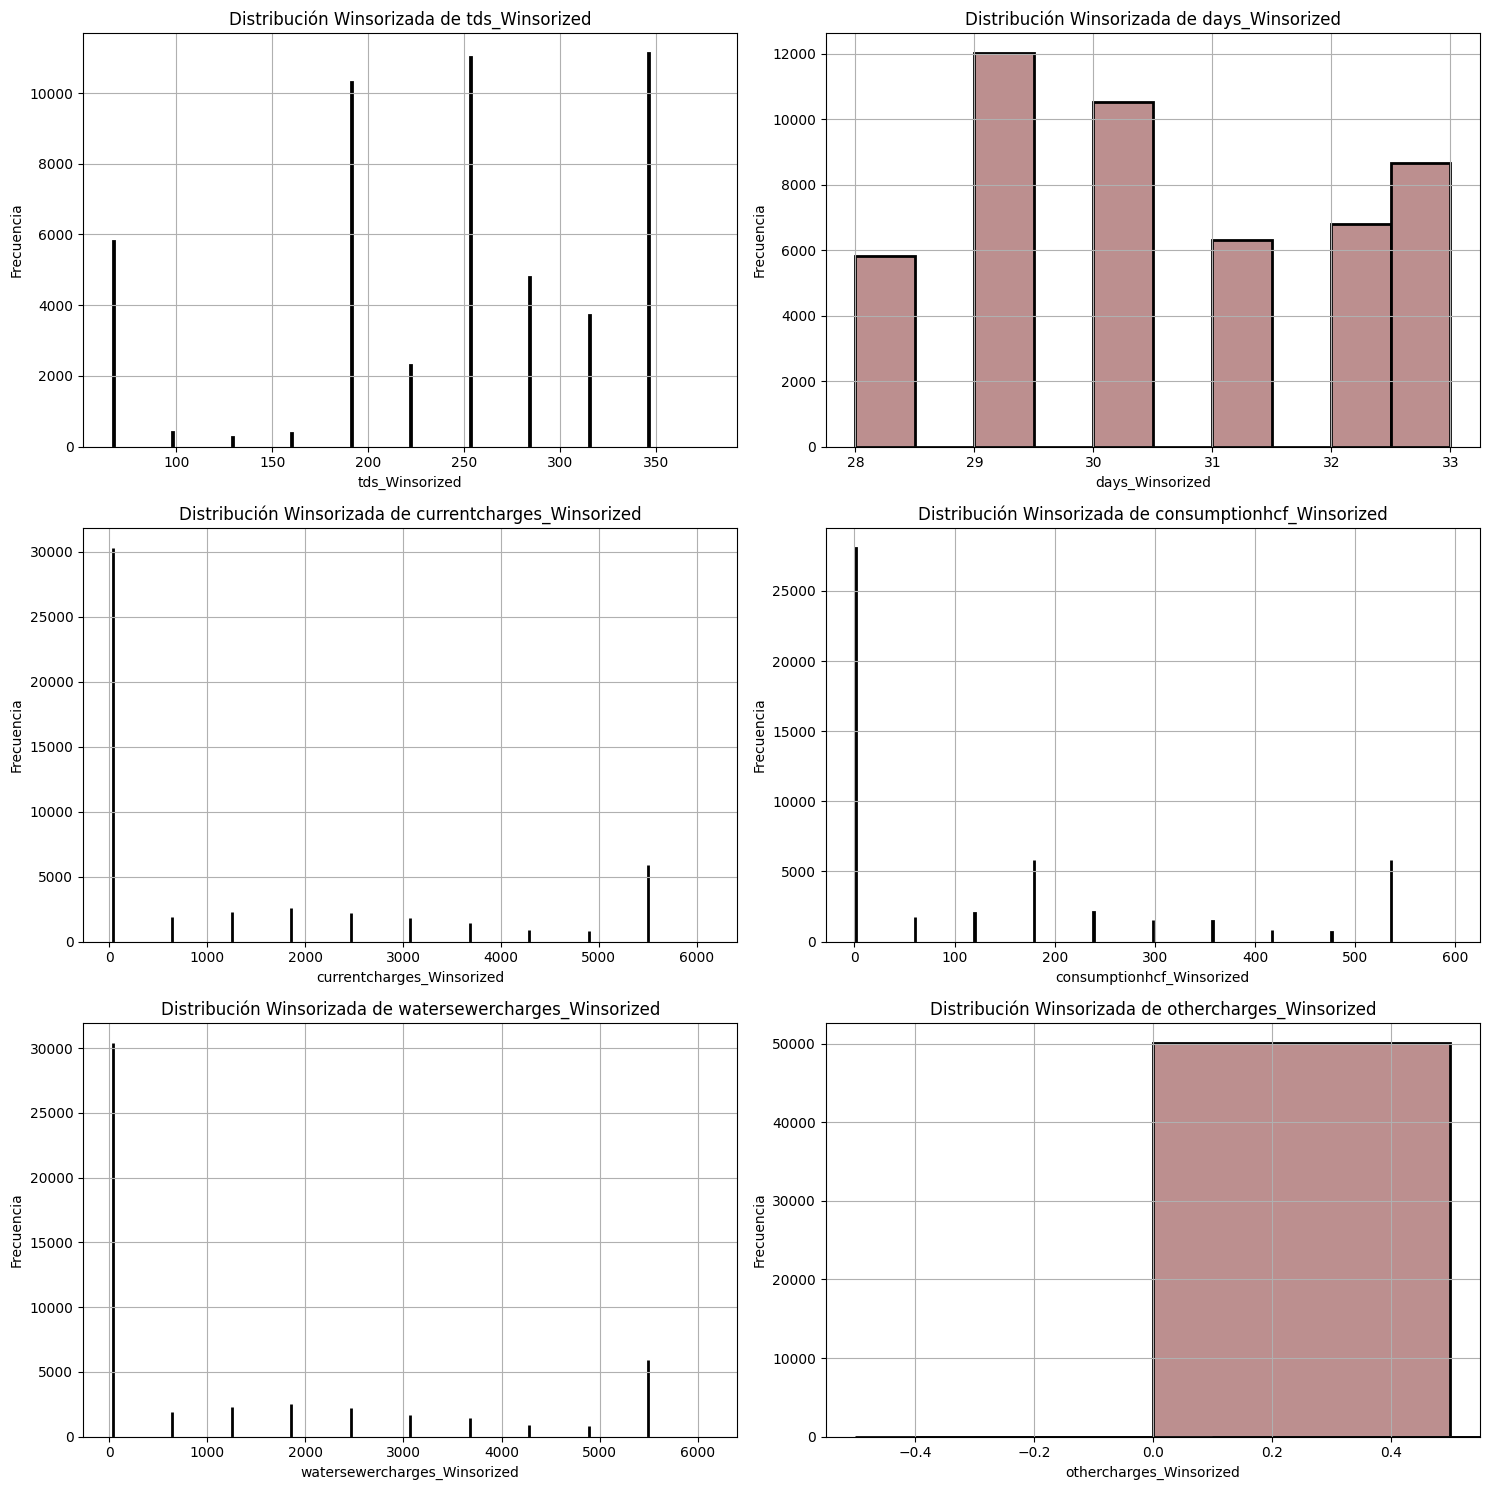

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = axes.ravel()

winsorized_columnas = ['tds_Winsorized', 'days_Winsorized', 'currentcharges_Winsorized',
                      'consumptionhcf_Winsorized', 'watersewercharges_Winsorized', 'othercharges_Winsorized']

for i, col in enumerate(winsorized_columnas):
    try:
        df[col].hist(ax=axes[i], color='rosybrown', width=0.5, linewidth=2.0, edgecolor='black')
        axes[i].set_title(f'Distribución Winsorizada de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')
    except Exception as e:
        axes[i].set_title(f"Error al trazar {col}: {e}")

plt.tight_layout()
plt.show()


# **5. Análisis Descriptivo de Datos**

Después de haber completado el proceso de limpieza y transformación, se llevó a cabo un análisis a profundidad del conjunto de datos. En esta primera fase se realizó un Análisis Descriptivo, el cual tuvo como objetivo comprender la estructura y las características de la información recopilada.

Este análisis permitió explorar propiedades de los datos y responder preguntas como:

*   ¿Cuántas observaciones y variables existen?
*   ¿Cuáles son los tipos de datos de las variables?
*   ¿Se encuentran valores nulos?
*   ¿Cuáles son la media, mediana, moda, rango, varianza y desviación estándar de las variables de tipo númerica?
*   ¿Cómo se distribuyen los valores en cada una de las variables?
*   ¿Existe alguna relación entre las variables?





En primera instancia, se obtuvó un resumen general de los datos descartando las columnas creadas de la Winsorización:

In [ ]:
df.drop(columns=['tds_Winsorized', 'days_Winsorized', 'currentcharges_Winsorized', 'consumptionhcf_Winsorized', 'watersewercharges_Winsorized', 'othercharges_Winsorized'], inplace=True)
df['location'] = df['location'].astype('category')
df.describe(include='all')

developmentname borough  \
count                              50155   50155   
unique                               110       7   
top     FHA REPOSSESSED HOUSES (GROUP V)     FHA   
freq                                4807   23409   
mean                                 NaN     NaN   
min                                  NaN     NaN   
25%                                  NaN     NaN   
50%                                  NaN     NaN   
75%                                  NaN     NaN   
max                                  NaN     NaN   
std                                  NaN     NaN   

                             accountname location           tds   rccode  \
count                              50155    50155  50155.000000    50155   
unique                               117      305           NaN      114   
top     FHA REPOSSESSED HOUSES (GROUP V)   BLD 01           NaN  Q026000   
freq                                4741     5259           NaN     4747   
mean                                 NaN      NaN    258.691437      NaN   
min                                  NaN      NaN      1.000000      NaN   
25%                                  NaN      NaN    209.000000      NaN   
50%                                  NaN      NaN    273.000000      NaN   
75%                                  NaN      NaN    338.000000      NaN   
max                                  NaN      NaN    559.000000      NaN   
std                                  NaN      NaN    101.519212      NaN   

          umisbillid                   revenuemonth  \
count   5.015500e+04                          50155   
unique           NaN                            NaN   
top              NaN                            NaN   
freq             NaN                            NaN   
mean    6.584326e+06  2017-10-12 22:50:13.936795904   
min     2.576038e+06            2013-01-01 00:00:00   
25%     4.132341e+06            2015-04-01 00:00:00   
50%     6.353682e+06            2017-11-01 00:00:00   
75%     8.562616e+06            2020-01-01 00:00:00   
max     1.217584e+07            2023-01-01 00:00:00   
std     2.661534e+06                            NaN   

                     servicestartdate                 serviceenddate  \
count                           50148                          50148   
unique                            NaN                            NaN   
top                               NaN                            NaN   
freq                              NaN                            NaN   
mean    2017-10-01 04:17:48.198133504  2017-11-03 08:43:21.579325184   
min               2002-12-22 00:00:00            2013-01-14 00:00:00   
25%               2015-03-22 00:00:00            2015-04-21 00:00:00   
50%               2017-10-22 00:00:00            2017-11-23 00:00:00   
75%               2019-12-23 00:00:00            2020-01-26 00:00:00   
max               2022-12-29 00:00:00            2023-01-27 00:00:00   
std                               NaN                            NaN   

                days meternumber  currentcharges              rateclass  \
count   50155.000000       50155    50155.000000                  50155   
unique           NaN         794             NaN                      5   
top              NaN  UN-METERED             NaN  BASIC WATER AND SEWER   
freq             NaN         179             NaN                  50051   
mean       33.201595         NaN     2143.459285                    NaN   
min         0.000000         NaN        0.000000                    NaN   
25%        29.000000         NaN       46.460000                    NaN   
50%        30.000000         NaN      197.360000                    NaN   
75%        32.000000         NaN     2595.260000                    NaN   
max      6968.000000         NaN   392036.460000                    NaN   
std        53.115153         NaN     5600.139052                    NaN   

        consumptionhcf  watersewercharges  othercharges  
co

Posterior al resumen, se obtuvó el número de observaciones y variables, dando respuesta a la incógnita de cuantas observaciones y variables existen en el dataframe:

In [ ]:
print(f"Observaciones: {df.shape[0]}, Variables: {df.shape[1]}")

Observaciones: 50155, Variables: 17


Después, se dio respuesta a la pregunta de los tipos de datos en las variables:

In [ ]:
df.dtypes

developmentname            category
borough                    category
accountname                category
location                   category
tds                           int64
rccode                     category
umisbillid                    int64
revenuemonth         datetime64[ns]
servicestartdate     datetime64[ns]
serviceenddate       datetime64[ns]
days                          int64
meternumber                category
currentcharges              float64
rateclass                  category
consumptionhcf                int64
watersewercharges           float64
othercharges                float64
dtype: object

Como se puede ver en los resultados, los tipos de datos son diversos y la mayoría son de tipo Categórico. A continuación, se muestra un conteo de los valores nulos, dando respuesta a sí existen valores nulos en cada una de las variables:

In [ ]:
df.isnull().sum()

developmentname      0
borough              0
accountname          0
location             0
tds                  0
rccode               0
umisbillid           0
revenuemonth         0
servicestartdate     7
serviceenddate       7
days                 0
meternumber          0
currentcharges       0
rateclass            0
consumptionhcf       0
watersewercharges    0
othercharges         0
dtype: int64

En base a los resultados obtenidos, se puede observar que no existen valores nulos en las variables. En el caso de las columnas servicestartdate y serviceenddate, indica que hay valores nulos debido a que fueron reemplazados por NAT. A continuación, se muestran la media, mediana, moda, rango, varianza y desviación estándar de las variables tipo númerica:

In [ ]:
numeros= ['tds', 'umisbillid', 'days', 'currentcharges', 'consumptionhcf', 'watersewercharges', 'othercharges']

for col in numeros:
    print(f"Estadística descriptiva para {col}:")
    print(f"  Median: {df[col].mean()}")
    print(f"  Mediana: {df[col].median()}")
    print(f"  Moda: {df[col].mode()[0]}")
    print(f"  Rango: {df[col].max() - df[col].min()}")
    print(f"  Varianza: {df[col].var()}")
    print(f"  Desviación Estándar: {df[col].std()}")
    print("\n")

Estadística descriptiva para tds:
  Median: 258.69143654670523
  Mediana: 273.0
  Moda: 260
  Rango: 558
  Varianza: 10306.15046999207
  Desviación Estándar: 101.51921231960023


Estadística descriptiva para umisbillid:
  Median: 6584326.121423587
  Mediana: 6353682.0
  Moda: 7495245
  Rango: 9599802
  Varianza: 7083764442085.193
  Desviación Estándar: 2661534.2271113466


Estadística descriptiva para days:
  Median: 33.20159505532848
  Mediana: 30.0
  Moda: 29
  Rango: 6968
  Varianza: 2821.219497395872
  Desviación Estándar: 53.1151531805743


Estadística descriptiva para currentcharges:
  Median: 2143.4592846176856
  Mediana: 197.36
  Moda: 38.07
  Rango: 392036.46
  Varianza: 31361557.4035289
  Desviación Estándar: 5600.139052160124


Estadística descriptiva para consumptionhcf:
  Median: 223.79886352307847
  Mediana: 26.0
  Moda: 0
  Rango: 434200
  Varianza: 4094239.027453892
  Desviación Estándar: 2023.4226022889761


Estadística descriptiva para watersewercharges:
  Median: 212

En base a los resultados, se puede observar que los datos tiene una gran variabilidad, en algunas variables la varianza y desviación estándar el resultado es muy grande sin embargo no quiere decir que los datos sean atípicos y en otras la moda y mediana es 0 pero se debe a que en esas variables la mayoría de los datos son 0 y no nulos.

A continuación, se muestra la distribución en cada una de las variables:

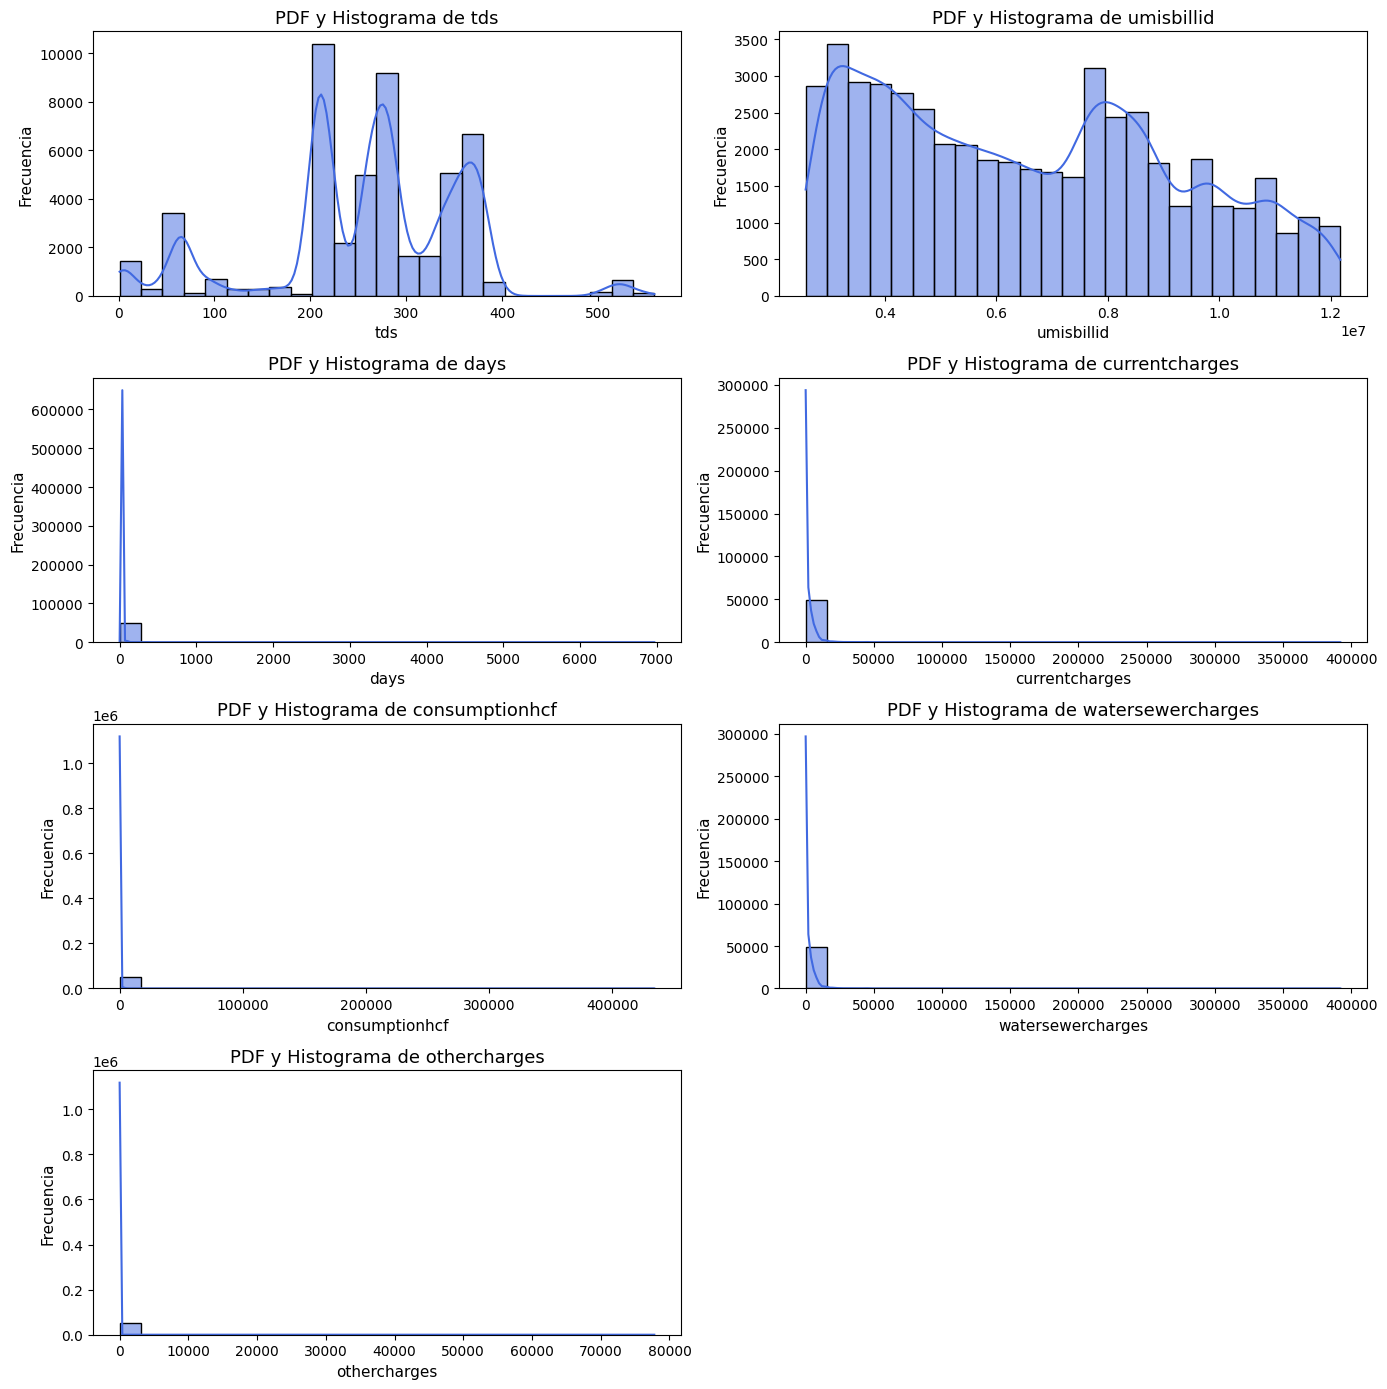

In [ ]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='royalblue')
    plt.title(f'PDF y Histograma de {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

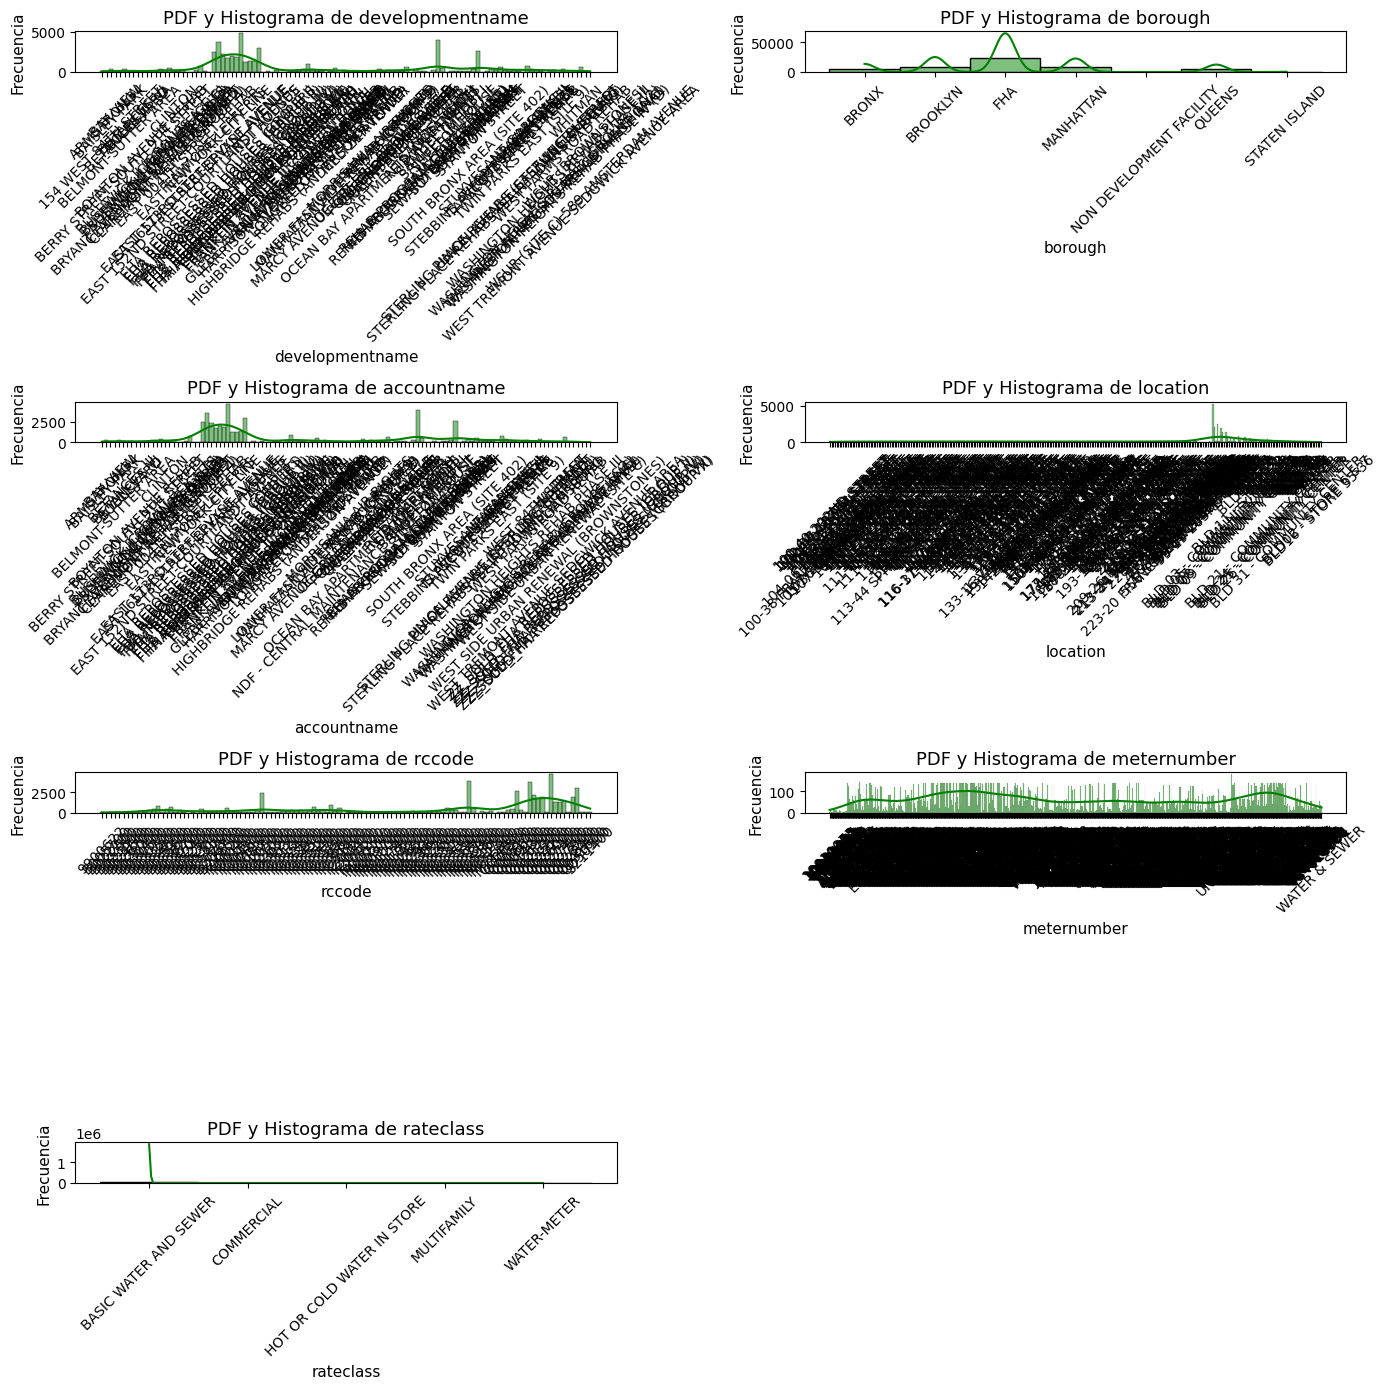

In [ ]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include='category').columns, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='green')
    plt.title(f'PDF y Histograma de {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.xticks(rotation=45)
    plt.ylabel('Frecuencia', fontsize=11)

plt.tight_layout()
plt.show()

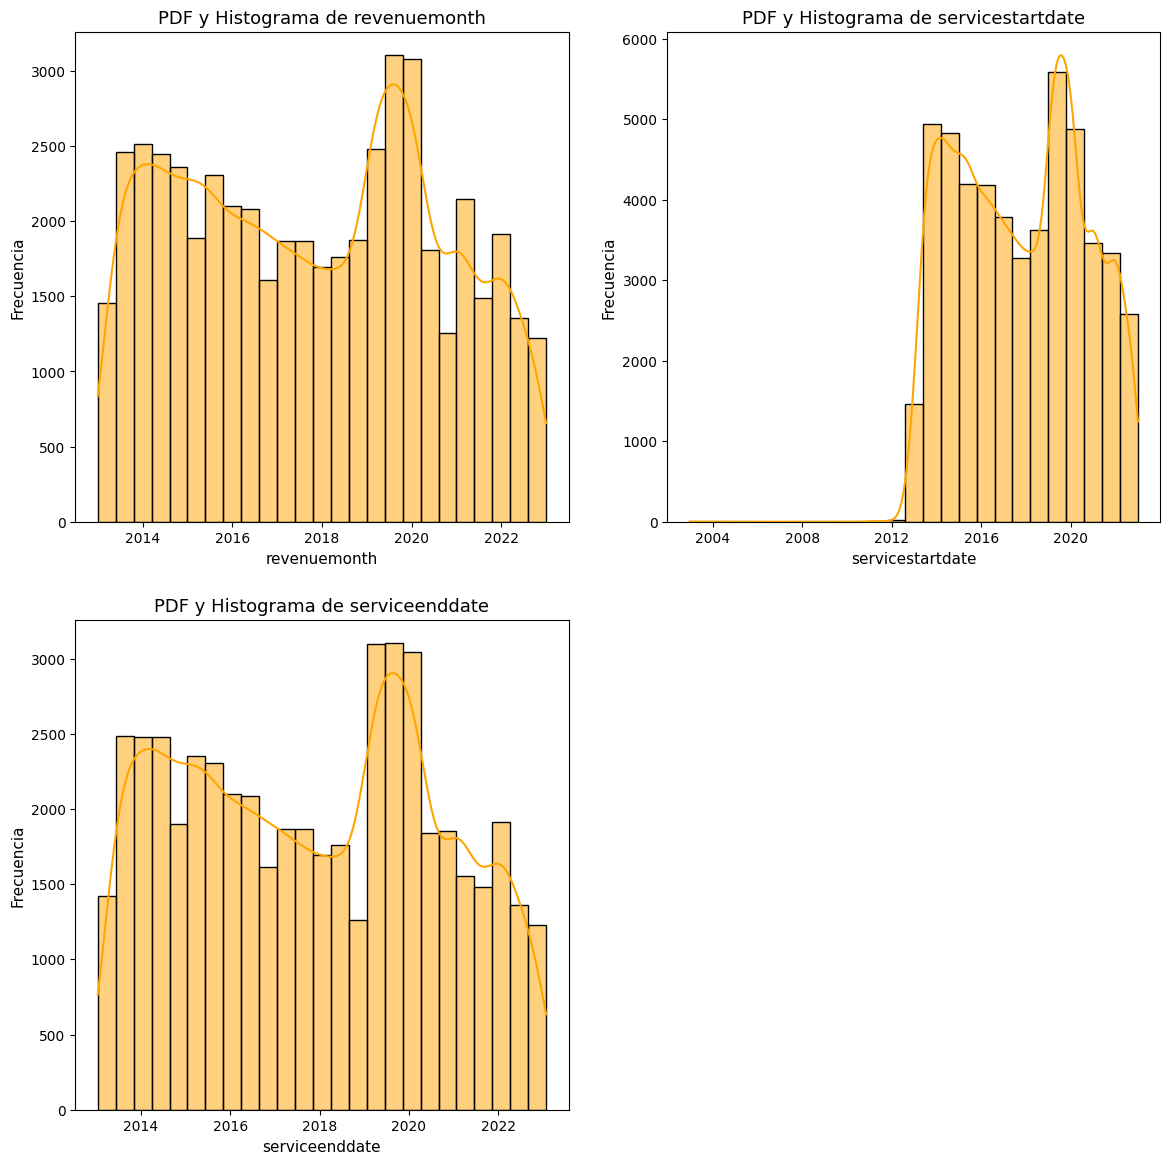

In [ ]:
plt.figure(figsize=(14, 14))
for i, col in enumerate(df.select_dtypes(include='datetime').columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, bins=25, color='orange')
    plt.title(f'PDF y Histograma de {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Frecuencia', fontsize=11)

En base a los resultados, se puede deducir que hay gran distribución sobre todo en las variables de tipo categórico y fecha. Para el caso de las variables de tipo numérica la distribución esta inclinada hacia la izquierda.

Por último, se muestra la posible relación entre las variables de tipo numérica:

In [ ]:
matriz_correlacion = df.select_dtypes(include=np.number).corr()

matriz_correlacion

tds  umisbillid      days  currentcharges  \
tds                1.000000   -0.045357  0.005071        0.053589   
umisbillid        -0.045357    1.000000 -0.012485        0.010836   
days               0.005071   -0.012485  1.000000        0.220329   
currentcharges     0.053589    0.010836  0.220329        1.000000   
consumptionhcf     0.013006   -0.001811  0.049919        0.265471   
watersewercharges  0.054778    0.007736  0.218455        0.996340   
othercharges      -0.009147    0.036895  0.040841        0.129184   

                   consumptionhcf  watersewercharges  othercharges  
tds                      0.013006           0.054778     -0.009147  
umisbillid              -0.001811           0.007736      0.036895  
days                     0.049919           0.218455      0.040841  
currentcharges           0.265471           0.996340      0.129184  
consumptionhcf           1.000000           0.267520     -0.000738  
watersewercharges        0.267520           1.000000      0.043949  
othercharges            -0.000738           0.043949      1.000000

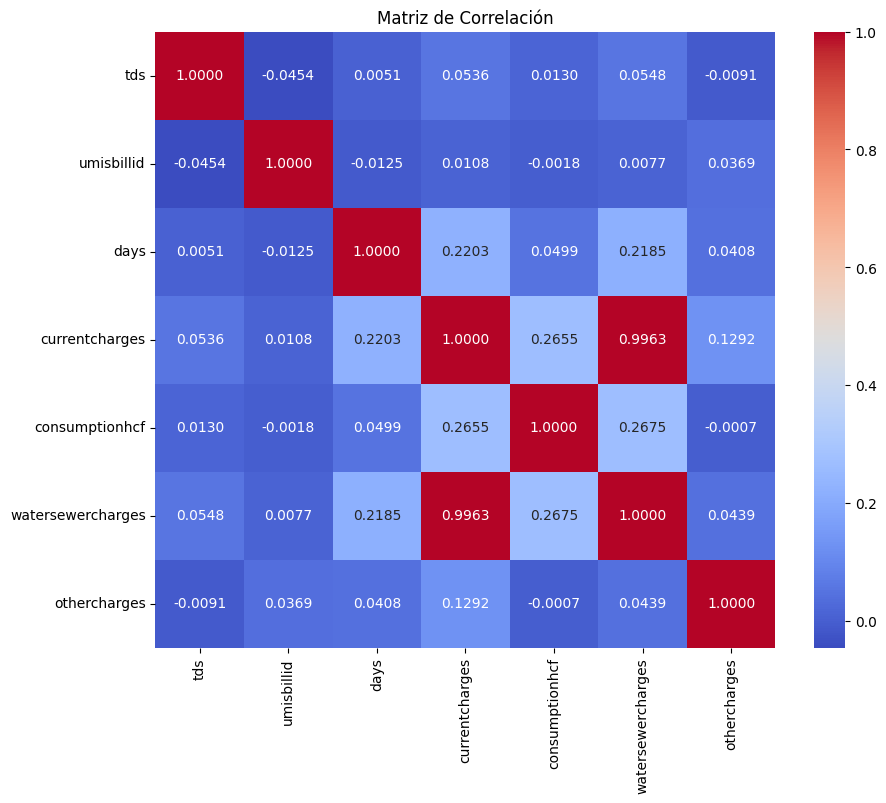

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".4f")
plt.title('Matriz de Correlación')
plt.show()

En base a los resultados de la correlación, se encontró que entre las variables currentcharges y watersewercharges hay una relación y en otros casos hay una pequeña diferencia entre las variables.

Adicional, también se muestra un Pairplot para tener un mejor panorama sobre la relación entre las variables:

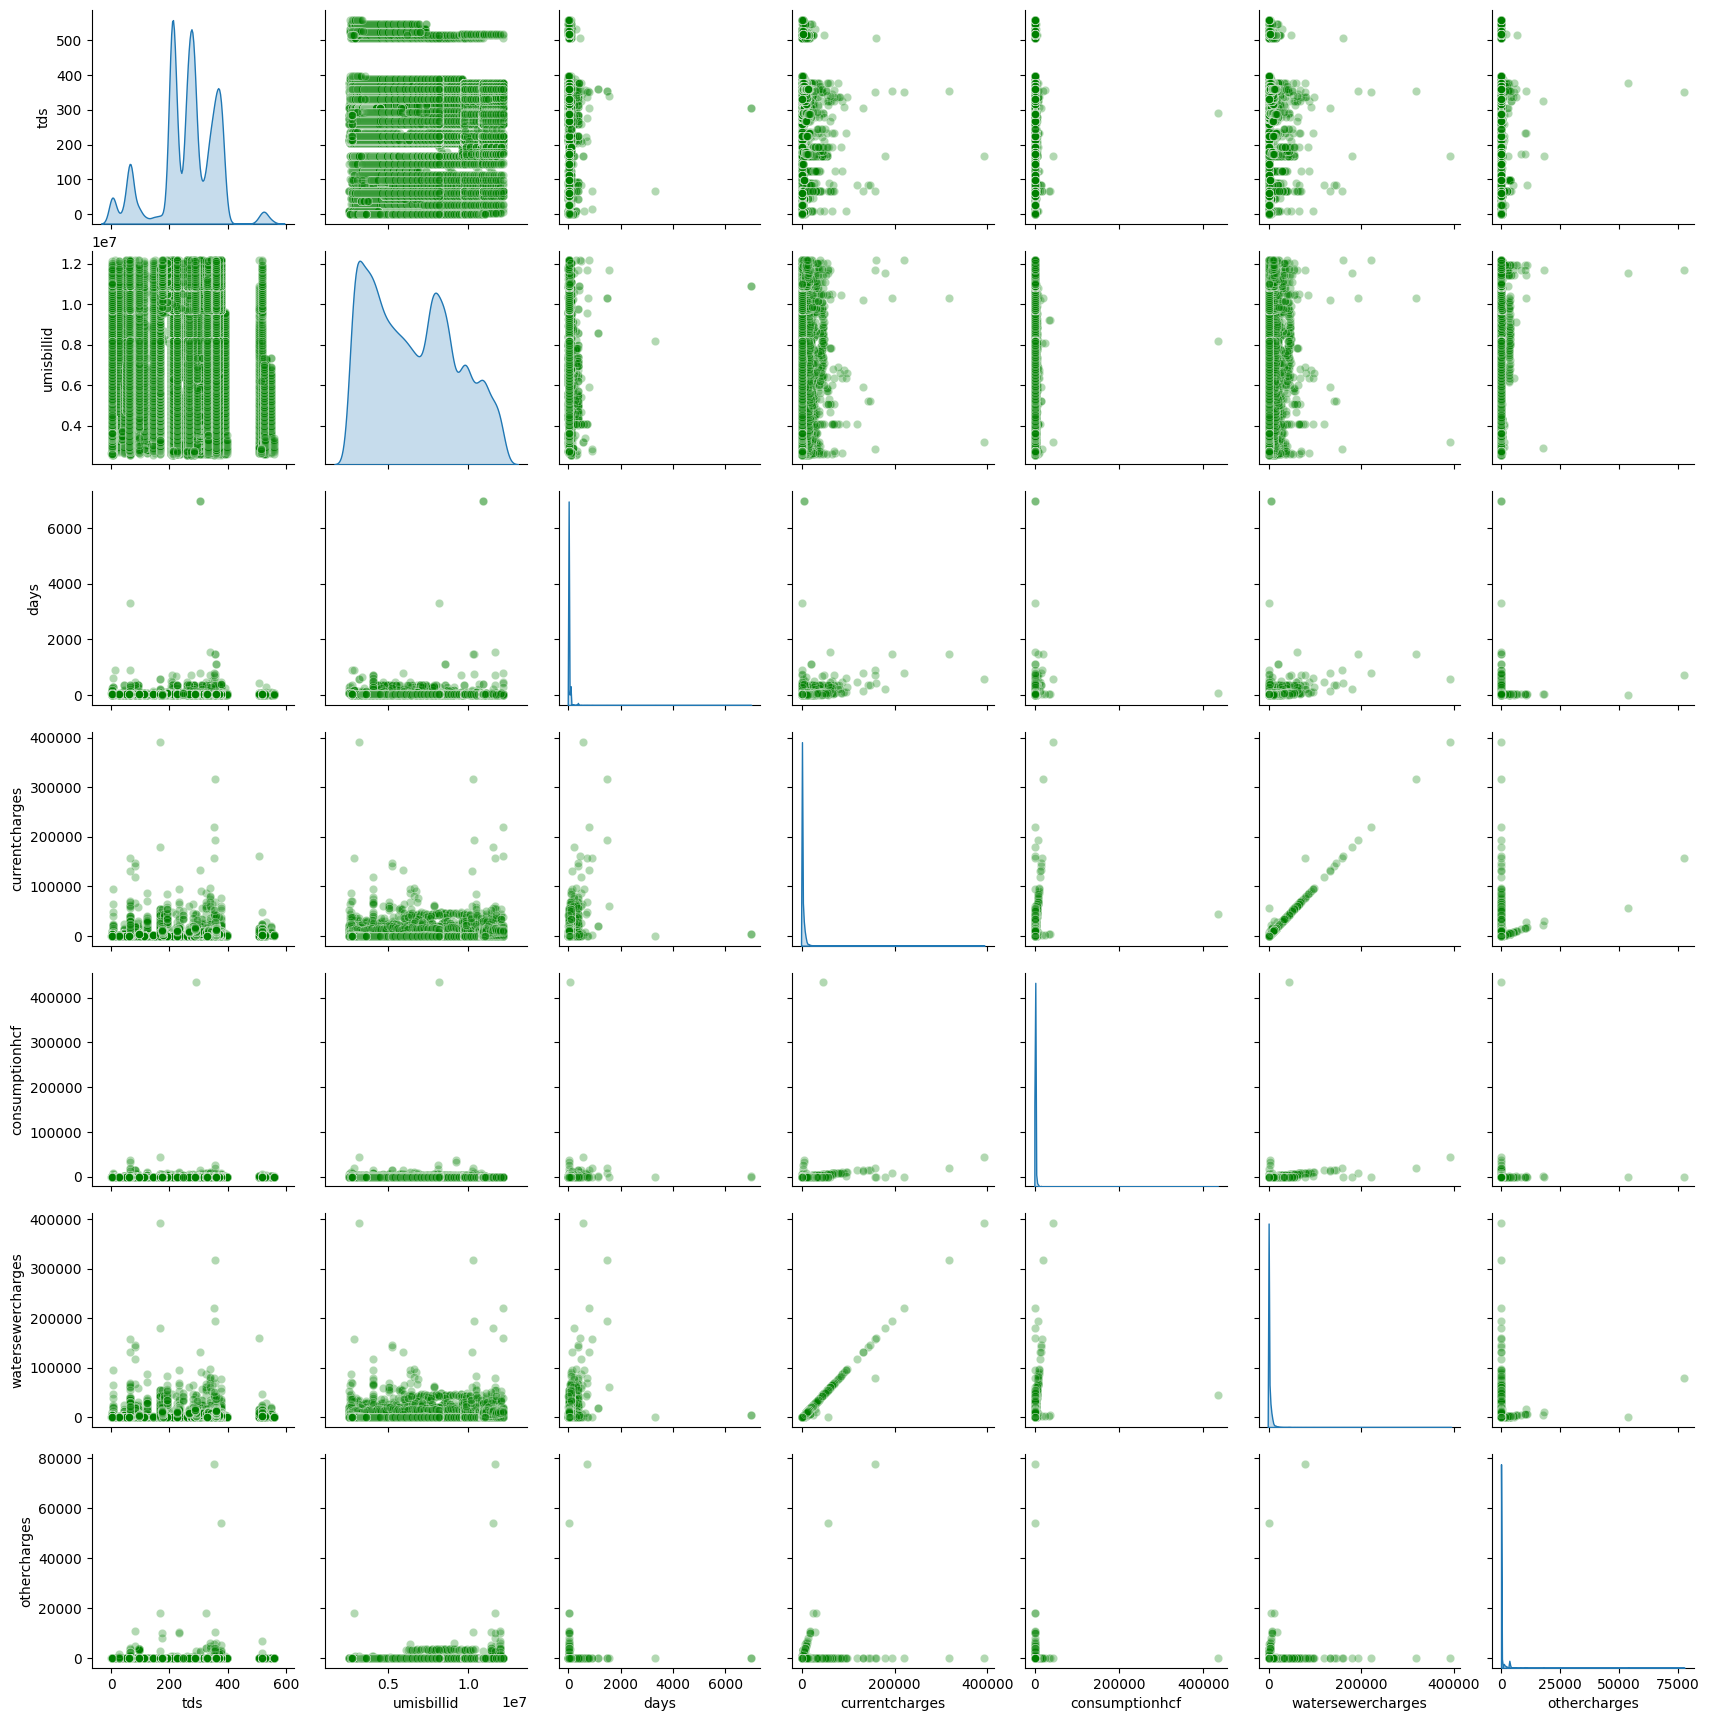

In [ ]:
columnas_numericas = df.select_dtypes(include=[np.number])
sns.pairplot(columnas_numericas, plot_kws={'alpha': 0.3, 'color': 'green'}, diag_kind='kde')
plt.show()

# **6. Análisis Exploratorio de los Datos**

En esta segunda fase se realizó un Análisis Exploratorio, el cual tuvo como objetivo dar respuesta a la siguientes preguntas en base a la definición del problema:

*   ¿Cuál es el consumo promedio de agua por mes?
*   ¿Cómo ha variado el consumo de agua a lo largo del tiempo?
*   ¿Qué porcentaje del consumo total de agua corresponde a cada categoría de usuarios?
*   ¿Cuál es el consumo de agua por desarrollo?
*   ¿Cuál es el consumo de agua por municipio?
*   ¿Cuál es el costo promedio del agua por mes?
*   ¿Cómo ha variado el costo del agua a lo largo del tiempo?
*   ¿Qué porcentaje del costo total del agua corresponde a cada categoría de usuario?
*   ¿Cuál es el costo total por desarrollo?
*   ¿Cuál es el costo total por municipio?
*   ¿Existe alguna relación entre el consumo y el costo del agua?
*   ¿Se observan valores atípicos?

Estas preguntas se clasificaron por Consumo, Costo y Relación entre el Consumo y Costo del agua.



###**Consumo**

**¿Cuál es el consumo promedio de agua por mes?**

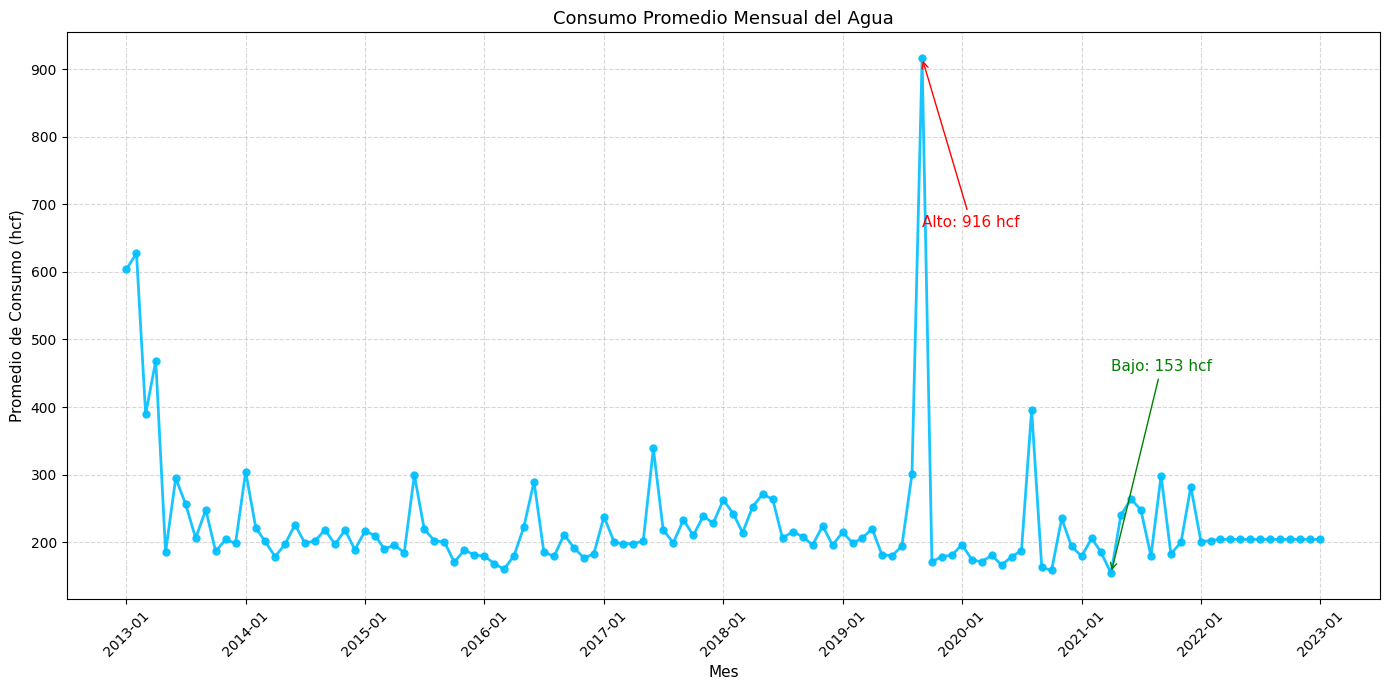

In [ ]:
promedio = df.groupby('revenuemonth')['consumptionhcf'].mean()

plt.figure(figsize=(14, 7))
plt.plot(promedio.index, promedio.values, marker='o', linestyle='-', linewidth=2, markersize=5, color='deepskyblue', alpha=0.9)

plt.title('Consumo Promedio Mensual del Agua', fontsize=13)
plt.xlabel('Mes', fontsize=11)
plt.ylabel('Promedio de Consumo (hcf)', fontsize=11)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

max_idx = promedio.idxmax()
max_val = promedio.max()
plt.annotate(f'Alto: {int(max_val)} hcf', xy=(max_idx, max_val), xytext=(max_idx, max_val - 250), arrowprops=dict(arrowstyle='->', color='red'),fontsize=11, color='red')

min_idx = promedio.idxmin()
min_val = promedio.min()
plt.annotate(f'Bajo: {int(min_val)} hcf', xy=(min_idx, min_val), xytext=(min_idx, min_val + 300), arrowprops=dict(arrowstyle='->', color='green'),fontsize=11, color='green')
plt.tight_layout()
plt.show()

En la gráfica se muestra el consumo promedio de agua de 2013 a 2023 en todo Nueva York. Se observa que el consumo promedio es muy variado empezando con un incremento y de ahí al decremento, posterior a esto entre 2019 y 2020 hay un incremento mayor a todo el periodo. El consumo promedio más bajo registrado fue a principios de 2021.

**¿Cómo ha variado el consumo de agua a lo largo del tiempo?**

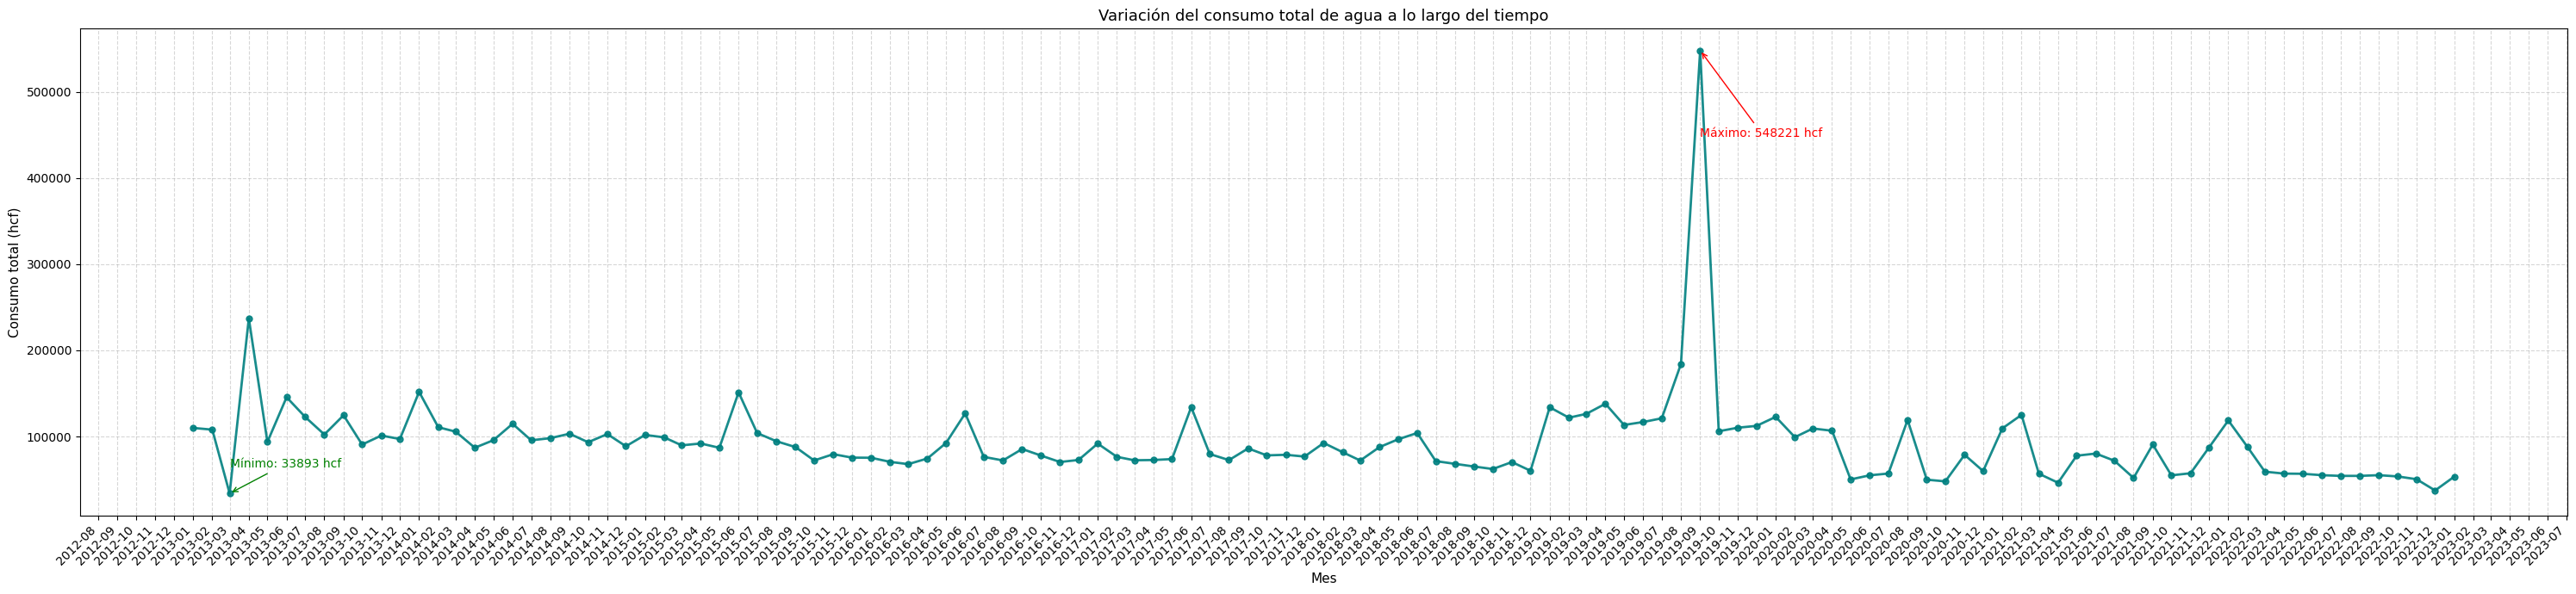

In [ ]:
consumomes = df.groupby('revenuemonth')['consumptionhcf'].sum()

plt.figure(figsize=(30, 7))
plt.plot(consumomes.index, consumomes.values, marker='o', linestyle='-', linewidth=2, markersize=5, color='teal', alpha=0.9)

plt.xlabel('Mes', fontsize=11)
plt.ylabel('Consumo total (hcf)', fontsize=11)
plt.title('Variación del consumo total de agua a lo largo del tiempo', fontsize=13)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

max_idx = consumomes.idxmax()
max_val = consumomes.max()
plt.annotate(f'Máximo: {int(max_val)} hcf', xy=(max_idx, max_val), xytext=(max_idx, max_val - 100000), arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

min_idx = consumomes.idxmin()
min_val = consumomes.min()
plt.annotate(f'Mínimo: {int(min_val)} hcf', xy=(min_idx, min_val), xytext=(min_idx, min_val + 30000), arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green', ha='left')

plt.tight_layout()
plt.show()

En la gráfica se muestra la variación del consumo mes por mes, lo que se puede observar es que en general el consumo se mantuvo estable. La variación alta registrada fue en el mes Octubre de 2019 y la más baja fue en Marzo de 2013.

**¿Qué porcentaje del consumo total de agua corresponde a cada categoría de usuarios?**

<ipython-input-403-40996b96cd7c>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumocategoria = df.groupby('rateclass')['consumptionhcf'].sum()


rateclass
BASIC WATER AND SEWER         99.989808
COMMERCIAL                     0.000000
HOT OR COLD WATER IN STORE     0.000000
MULTIFAMILY                    0.000000
WATER-METER                    0.010192
Name: consumptionhcf, dtype: float64


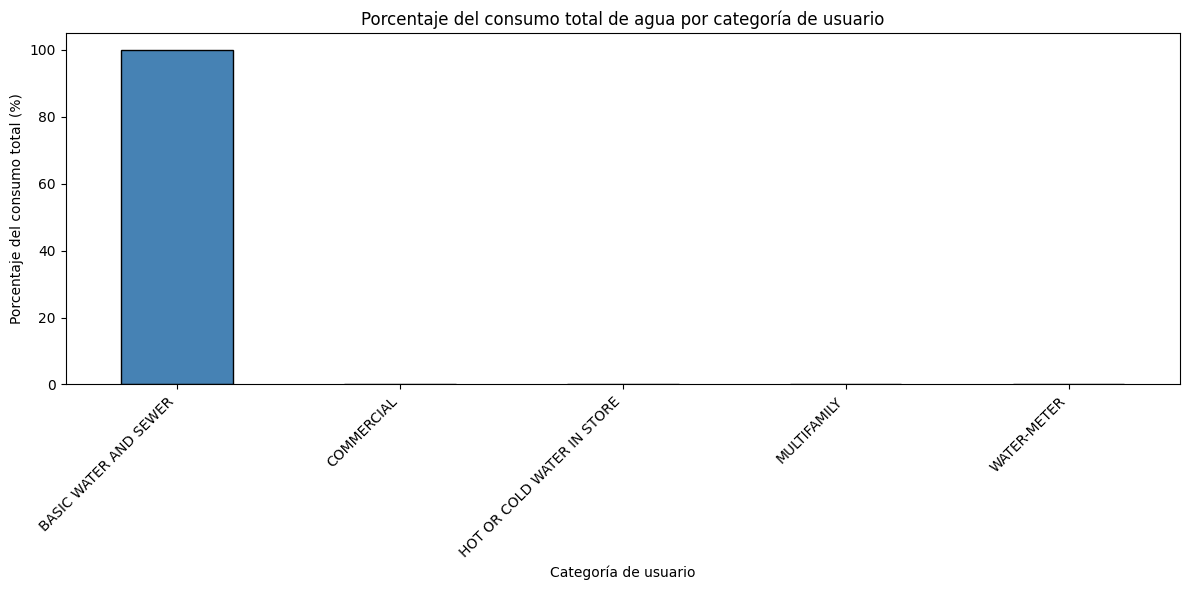

In [ ]:
consumototal= df['consumptionhcf'].sum()

consumocategoria = df.groupby('rateclass')['consumptionhcf'].sum()

percentage_consumption = (consumocategoria/ consumototal) * 100

print(percentage_consumption)

plt.figure(figsize=(12, 6))
percentage_consumption.plot(kind='bar', color='steelblue', width=0.5, linewidth=1.0, edgecolor='black')
plt.xlabel('Categoría de usuario')
plt.ylabel('Porcentaje del consumo total (%)')
plt.title('Porcentaje del consumo total de agua por categoría de usuario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En esta gráfica se muestre el porcentaje de consumo total por categoría, en esta se puede ver que en la categoría Basic Water and Sewer obtuvo poco más del 99% cubriendo el mayor porcentaje registrado a diferencia de las otras categorías que registraron menos del 1 %.

**¿Cuál es el consumo de agua por desarrollo?**

<ipython-input-404-be1113d89eb5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumodesarrollo = df.groupby('developmentname')['consumptionhcf'].sum()


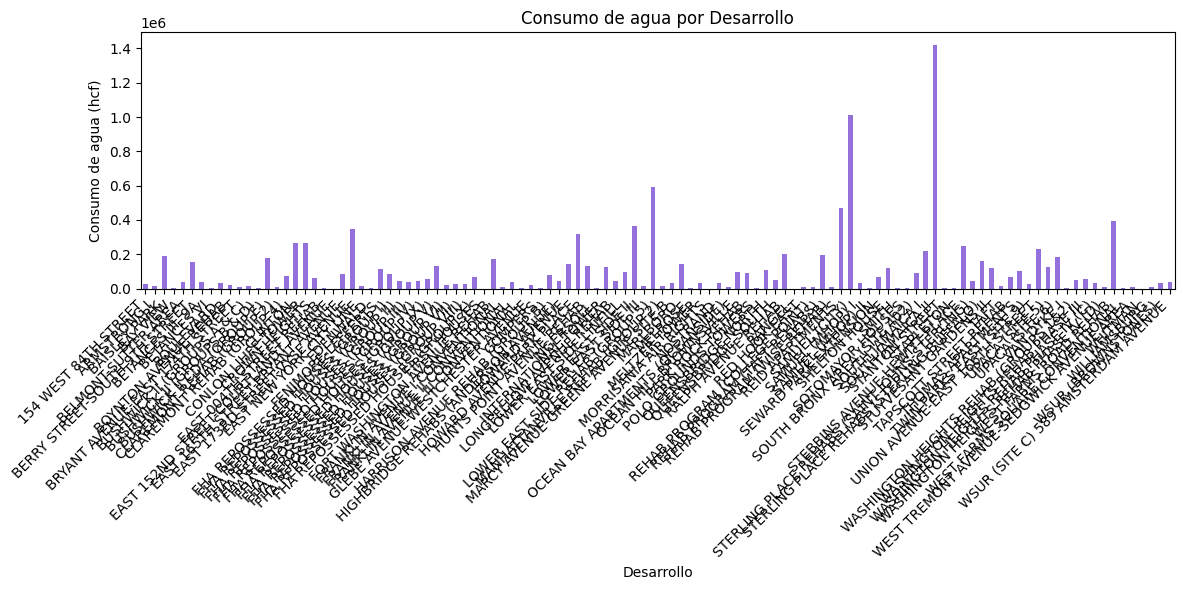

In [ ]:
consumodesarrollo = df.groupby('developmentname')['consumptionhcf'].sum()

plt.figure(figsize=(12, 6))
consumodesarrollo.plot(kind='bar', color='mediumpurple')
plt.xlabel('Desarrollo')
plt.ylabel('Consumo de agua (hcf)')
plt.title('Consumo de agua por Desarrollo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En esta gráfica el consumo de agua en cada de los desarrollos de Nueva York, se puede observar que en la mayor parte de los desarrollos hubo muy poco consumo y sólo en algunos el consumo fue alto.

**¿Cuál es el consumo de agua por municipio?**

<ipython-input-405-4ae078b0cdab>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consumodistrito = df.groupby('borough')['consumptionhcf'].sum()


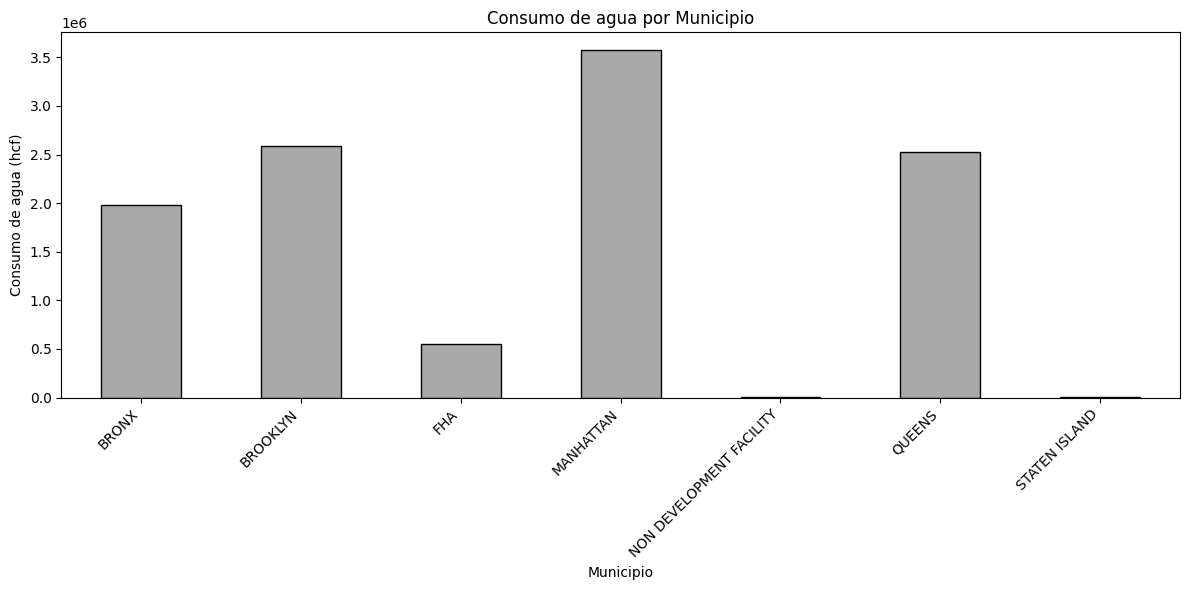

In [ ]:
consumodistrito = df.groupby('borough')['consumptionhcf'].sum()

plt.figure(figsize=(12, 6))
consumodistrito.plot(kind='bar', color='darkgrey', width=0.5, linewidth=1.0, edgecolor='black')
plt.xlabel('Municipio')
plt.ylabel('Consumo de agua (hcf)')
plt.title('Consumo de agua por Municipio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En la gráfica se muestra el consumo de agua por cada desarrollo, en está se observa que en la mayoría de los desarrollos hubo un alto consumo, el mayor registrado fue en Manhattan. El más bajo fue en Non Development Facility y Staten Island.

###**Costo**

**¿Cuál es el costo promedio del agua por mes?**

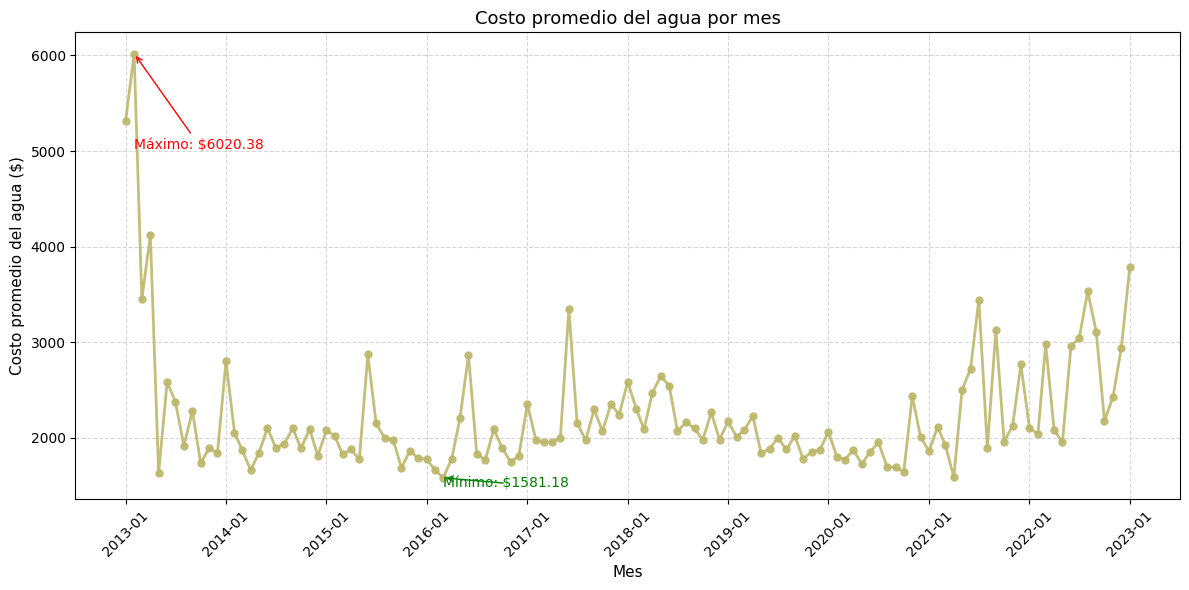

In [ ]:
promedio_costo = df.groupby('revenuemonth')['currentcharges'].mean()

plt.figure(figsize=(12, 6))
plt.plot(promedio_costo.index, promedio_costo.values, color='darkkhaki', marker='o', linestyle='-', linewidth=2, markersize=5, alpha=0.9)

plt.xlabel('Mes', fontsize=11)
plt.ylabel('Costo promedio del agua ($)', fontsize=11)
plt.title('Costo promedio del agua por mes', fontsize=13)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

max_idx = promedio_costo.idxmax()
max_val = promedio_costo.max()
plt.annotate(f'Máximo: ${max_val:.2f}', xy=(max_idx, max_val), xytext=(max_idx, max_val - 1000), arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red', ha='left')

min_idx = promedio_costo.idxmin()
min_val = promedio_costo.min()
plt.annotate(f'Mínimo: ${min_val:.2f}', xy=(min_idx, min_val), xytext=(min_idx, min_val - 100), arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green')

plt.tight_layout()
plt.show()

En la gráfica anterior se muestra el costo promedio durante el 2013 a 2023, se puede observar que hubo mucha variación en los costos promedio empezando con un incremento y de ahí a un drecemento. El costo promedio mayor registrado a principios de 2013 y el menor fue a principios de 2016.

**¿Cómo ha variado el costo del agua a lo largo del tiempo?**

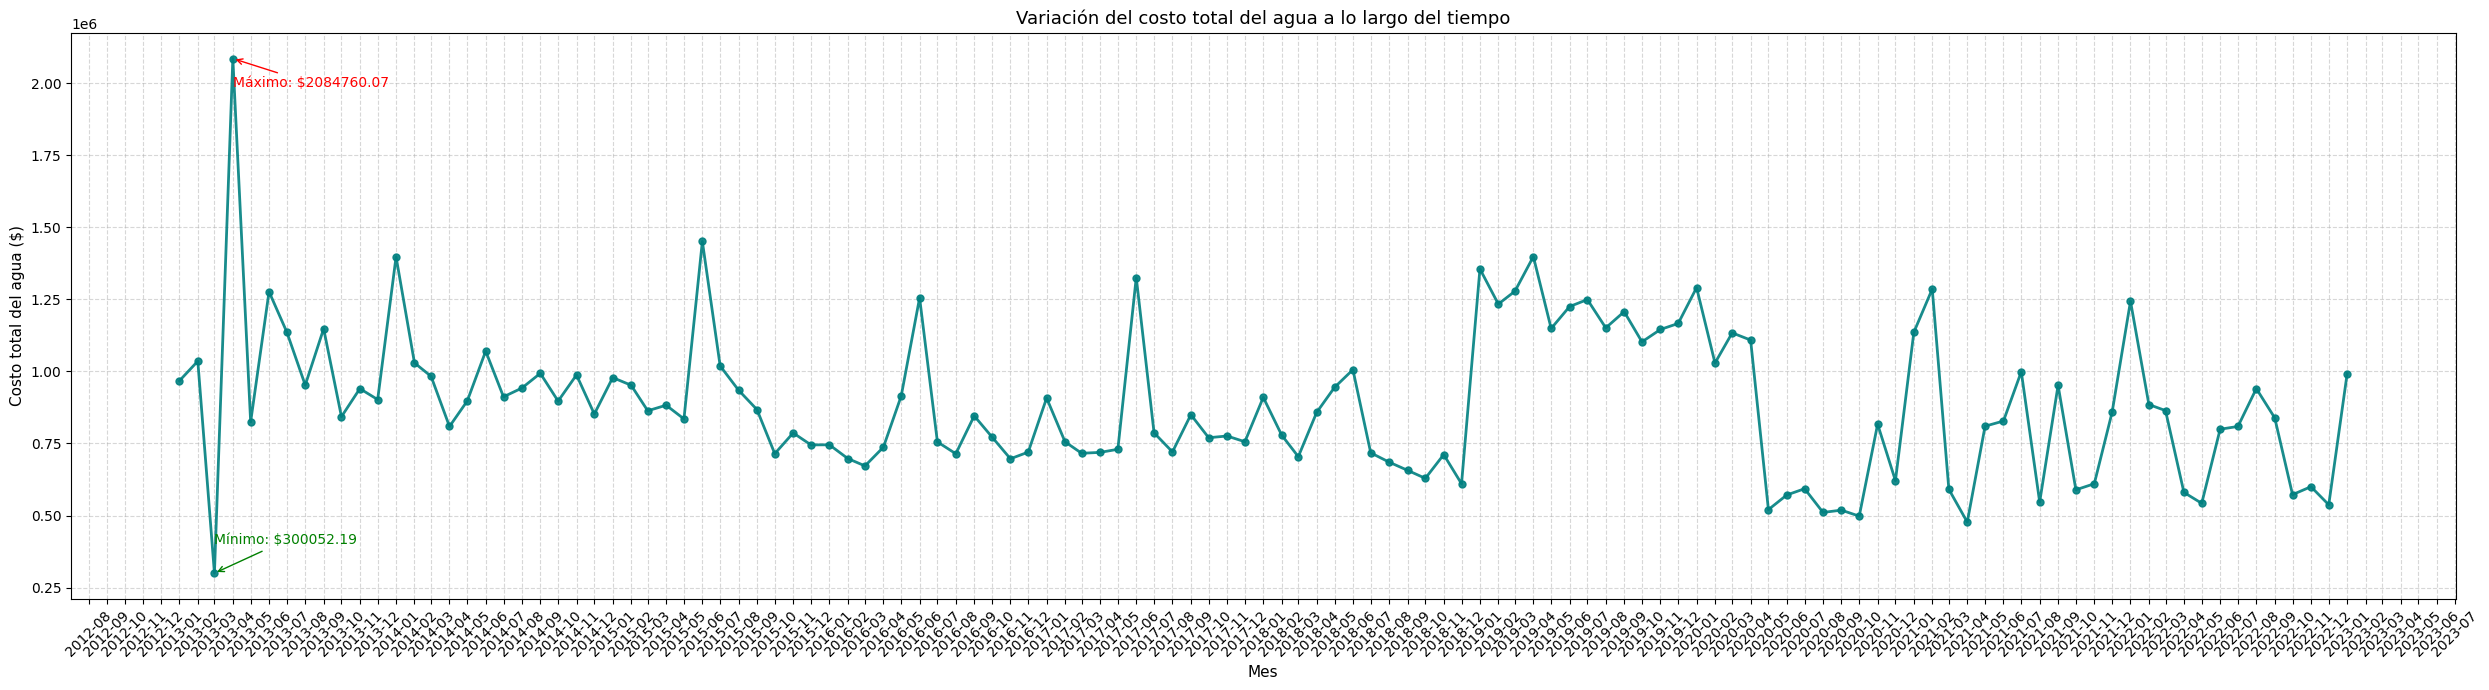

In [ ]:
costo_mes = df.groupby('revenuemonth')['currentcharges'].sum()

plt.figure(figsize=(25, 7))
plt.plot(costo_mes.index, costo_mes.values, color='teal', marker='o', linestyle='-', linewidth=2, markersize=5, alpha=0.9)

plt.xlabel('Mes', fontsize=11)
plt.ylabel('Costo total del agua ($)', fontsize=11)
plt.title('Variación del costo total del agua a lo largo del tiempo', fontsize=13)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

plt.grid(True, linestyle='--', alpha=0.5)

max_idx = costo_mes.idxmax()
max_val = costo_mes.max()
plt.annotate(f'Máximo: ${max_val:.2f}', xy=(max_idx, max_val), xytext=(max_idx, max_val - 100000), arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

min_idx = costo_mes.idxmin()
min_val = costo_mes.min()
plt.annotate(f'Mínimo: ${min_val:.2f}', xy=(min_idx, min_val), xytext=(min_idx, min_val + 100000), arrowprops=dict(arrowstyle='->', color='green'), fontsize=10, color='green')

plt.tight_layout()
plt.show()

En la gráfica se muestra la variación del costo de 2013 a 2023, mostrando una variación durante este periodo. El pico más alto registrado fue en Marzo de 2013 y el más bajo fue en ese mismo año pero en el mes de Febrero.

**¿Qué porcentaje del costo total del agua corresponde a cada categoría de usuario?**

<ipython-input-408-78b5b3c14c89>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  costo_categoria = df.groupby('rateclass')['currentcharges'].sum()


rateclass
BASIC WATER AND SEWER         99.950396
COMMERCIAL                     0.000535
HOT OR COLD WATER IN STORE     0.002715
MULTIFAMILY                    0.036487
WATER-METER                    0.009867
Name: currentcharges, dtype: float64


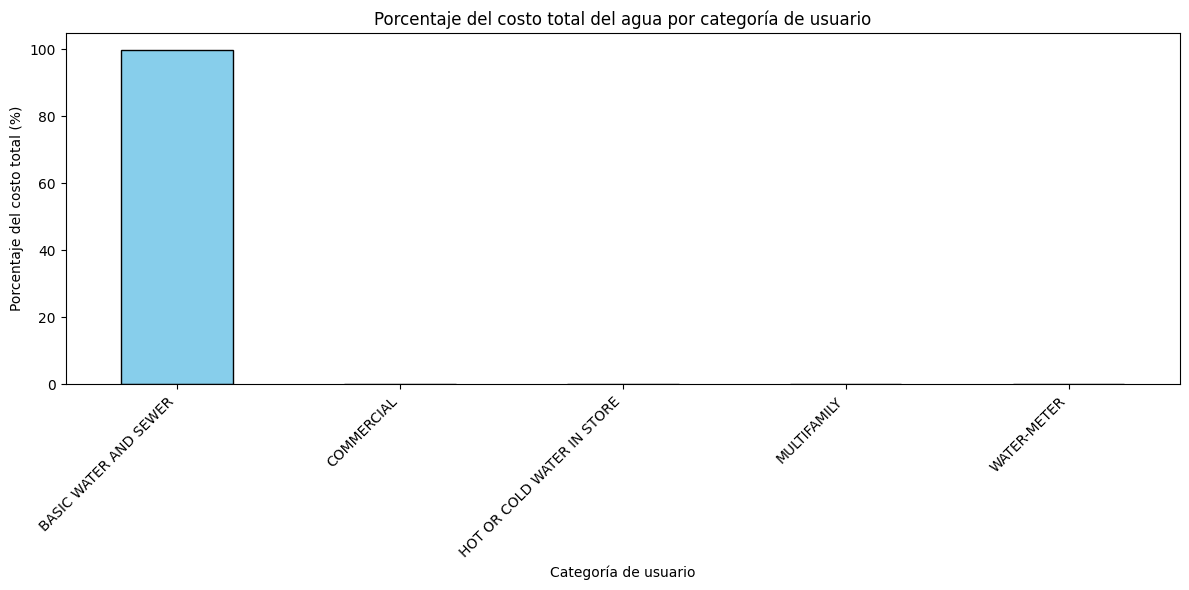

In [ ]:
costo_total = df['currentcharges'].sum()
costo_categoria = df.groupby('rateclass')['currentcharges'].sum()
porcentaje_costo = (costo_categoria / costo_total) * 100
print(porcentaje_costo)

plt.figure(figsize=(12, 6))
porcentaje_costo.plot(kind='bar', color='skyblue', width=0.5, linewidth=1.0, edgecolor='black')
plt.xlabel('Categoría de usuario')
plt.ylabel('Porcentaje del costo total (%)')
plt.title('Porcentaje del costo total del agua por categoría de usuario')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En está gráfica se muestra el porcentaje de costo por cada categoría. Se puede observar que la categoría Basic Water and Sewer tiene un poco arriba del 99 % a diferencia de las restantes categorías que registraron menos del 1 %.

**¿Cuál es el costo total por desarrollo?**

<ipython-input-409-3f8076496f2d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  costo_desarrollo = df.groupby('developmentname')['currentcharges'].sum()


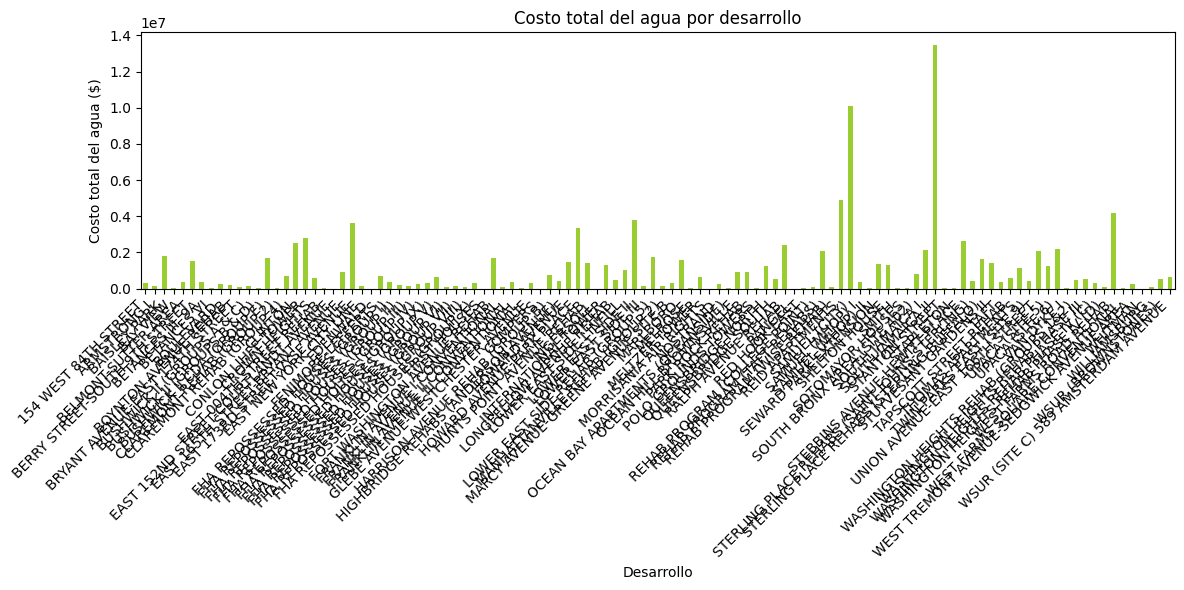

In [ ]:
costo_desarrollo = df.groupby('developmentname')['currentcharges'].sum()

plt.figure(figsize=(12, 6))
costo_desarrollo.plot(kind='bar', color='yellowgreen')
plt.xlabel('Desarrollo')
plt.ylabel('Costo total del agua ($)')
plt.title('Costo total del agua por desarrollo')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En la gráfica anterior se muestra el costo total por desarrollo, en el se observa que la mayor parte de los desarrollos hay un costo bajo y sólo en dos desarrollos hubo costo alto.

**¿Cuál es el costo total por municipio?**

<ipython-input-410-6ed50d1cdb3c>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  costo_municipio = df.groupby('borough')['currentcharges'].sum()


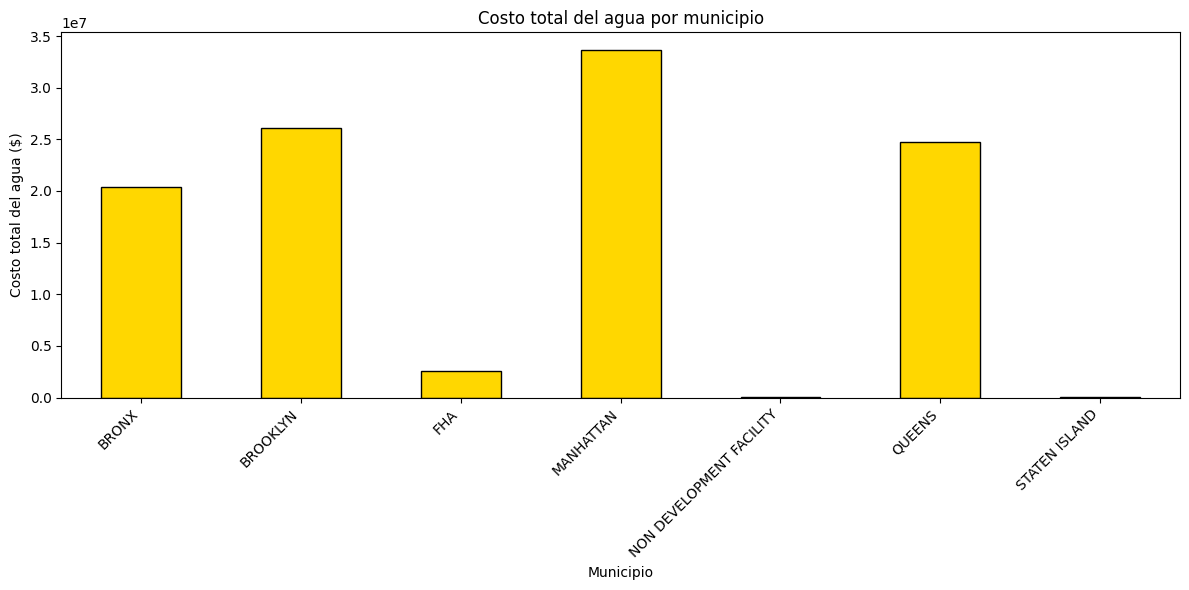

In [ ]:
costo_municipio = df.groupby('borough')['currentcharges'].sum()

plt.figure(figsize=(12, 6))
costo_municipio.plot(kind='bar', color='gold', width=0.5, linewidth=1.0, edgecolor='black')
plt.xlabel('Municipio')
plt.ylabel('Costo total del agua ($)')
plt.title('Costo total del agua por municipio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

En la gráfica se muestra el costo total por cada municipio, se puede ver que en la mayoría de los desarrollos fue alto, en dos municipios el costo fue el mismo y en dos el costo fue por debajo del promedio. El costo más alto fue en Manhattan.

###**Relación entre el Consumo y Costo**


**¿Existe alguna relación entre el consumo y el costo del agua?**

La correlación entre el consumo y el costo del agua es: 0.2654714205912083


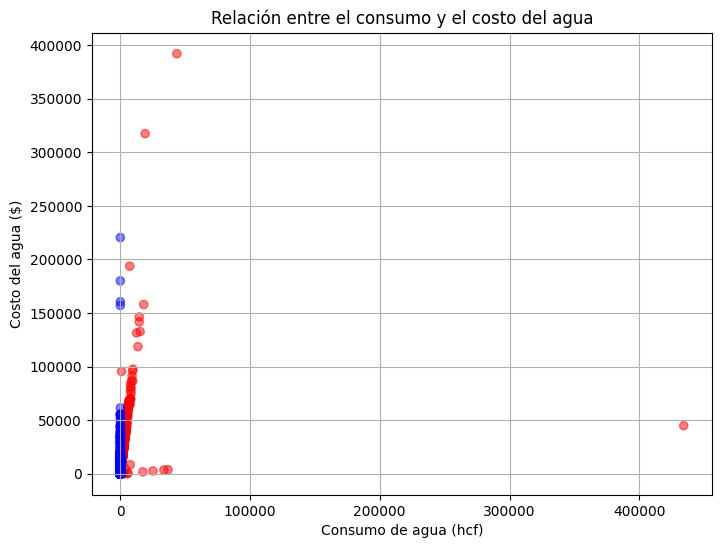

In [ ]:
correlation = df['consumptionhcf'].corr(df['currentcharges'])
print(f"La correlación entre el consumo y el costo del agua es: {correlation}")

colores = ['red' if i else 'blue' for i in df['consumptionhcf'] > df['consumptionhcf'].mean()]
plt.figure(figsize=(8, 6))
plt.scatter(df['consumptionhcf'], df['currentcharges'], alpha=0.5, c=colores)
plt.xlabel('Consumo de agua (hcf)')
plt.ylabel('Costo del agua ($)')
plt.title('Relación entre el consumo y el costo del agua')
plt.grid(True)
plt.show()

En base a los gráficas anteriores mostró que el consumo y costo tienen una fuerte relación, para reafirmar esta hipótesis se cálculo la correlación entre estas dos variables (consumo y costo) y se graficaron en un diagrama de dispersión. Los resultados demostraron que hay una relación fuerte solo hay algunos puntos que se encontraban fuera del rango.

**¿Se observan valores atípicos?**

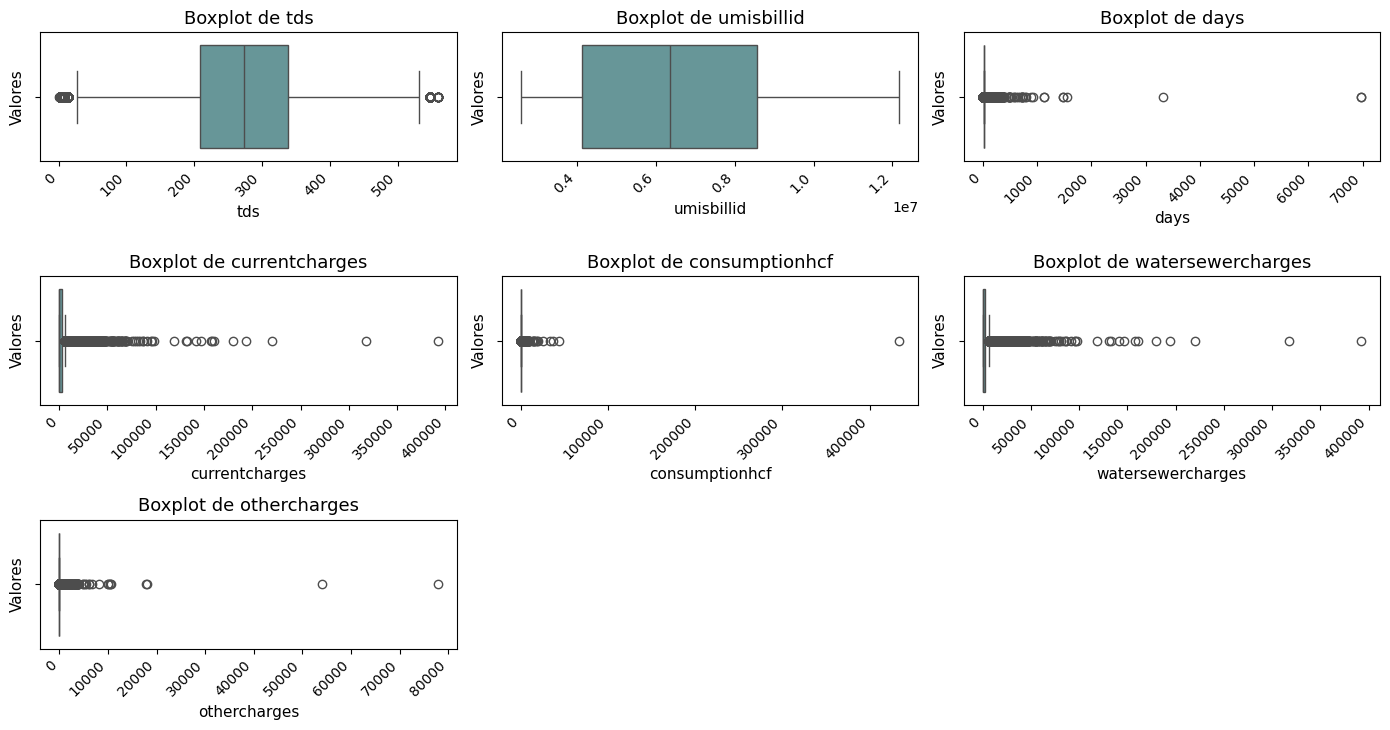

In [ ]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(14, 14))
for i, col in enumerate(columnas_numericas, 1):
    plt.subplot(6, 3, i)
    sns.boxplot(x=df[col].dropna(), color='cadetblue')
    plt.title(f'Boxplot de {col}', fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel('Valores', fontsize=11)
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se realizaron algunas pruebas para identificar valores atípicos, según las gráficas muestra que existen valores de este tipo sin embargo no fue del todo seguro eran atípicos.

In [ ]:
columnas_numericas = df.select_dtypes(include=[np.number]).columns

def normality_tests(data, column_name):
    print(f"\nPruebas de normalidad para la columna: {column_name}")

    shapiro_test = stats.shapiro(data.sample(min(5000, len(data)), random_state=42))
    print(f"Shapiro-Wilk Test: p-valor = {shapiro_test.pvalue:.5f}")

    ks_test = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov Test: p-valor = {ks_test.pvalue:.5f}")

    anderson_test = stats.anderson(data, dist='norm')
    print(f"Anderson-Darling Test: Estadístico = {anderson_test.statistic:.5f}")
    for i in range(len(anderson_test.critical_values)):
        sl, cv = anderson_test.significance_level[i], anderson_test.critical_values[i]
        if anderson_test.statistic < cv:
            print(f"  Al nivel de significancia {sl}%, los datos parecen normales.")
        else:
            print(f"  Al nivel de significancia {sl}%, los datos NO parecen normales.")

    dagostino_test = stats.normaltest(data)
    print(f"D'Agostino-Pearson Test: p-valor = {dagostino_test.pvalue:.5f}")

In [ ]:
def plot_distribution(data, column_name):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=50, kde=True, color="brown")
    plt.title(f"Distribución de {column_name}")

    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"QQ-Plot de {column_name}")

    plt.show()

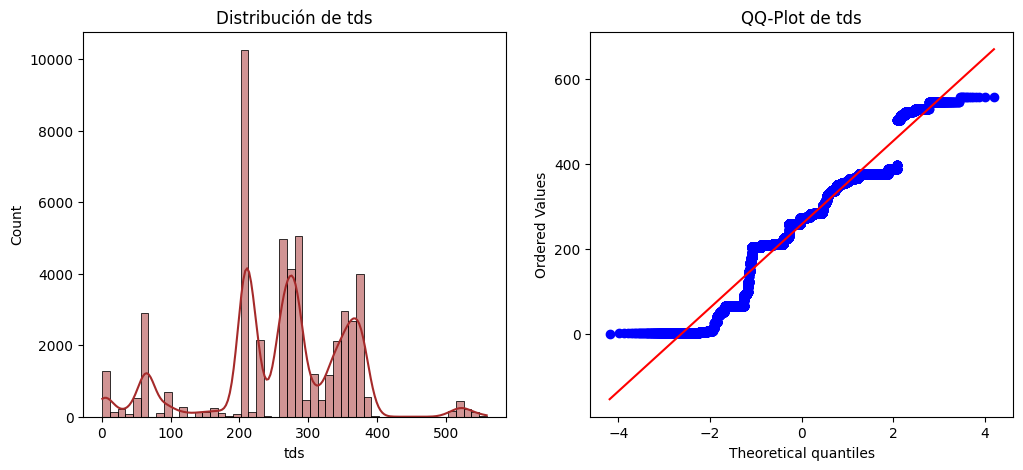


Pruebas de normalidad para la columna: tds
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 1077.70370
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


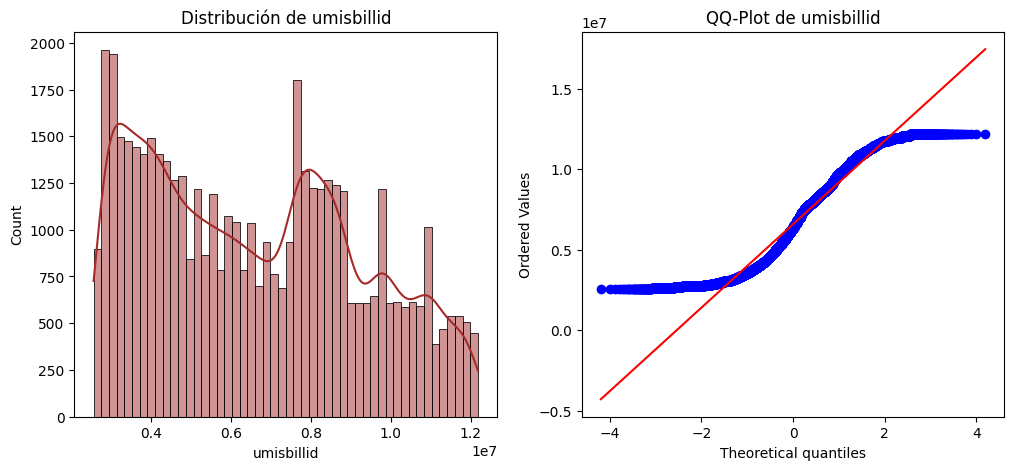


Pruebas de normalidad para la columna: umisbillid
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 700.68126
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


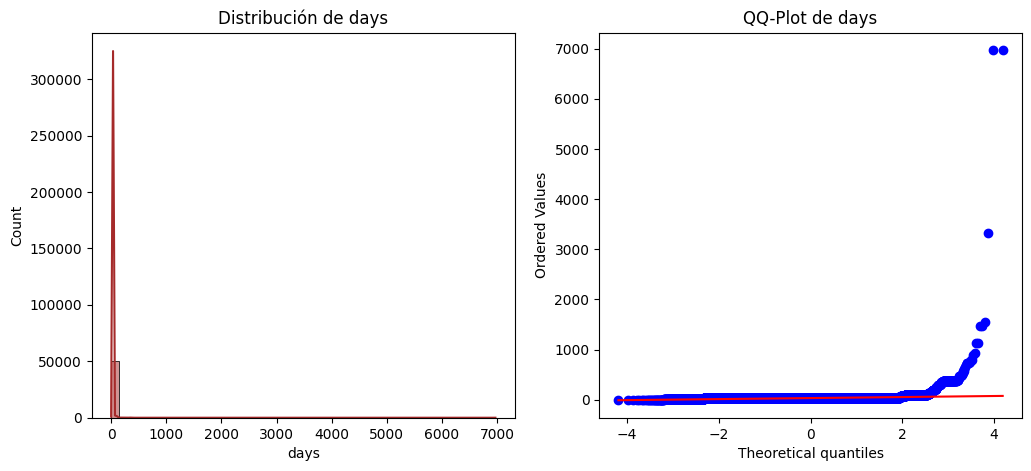


Pruebas de normalidad para la columna: days
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 16429.24168
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


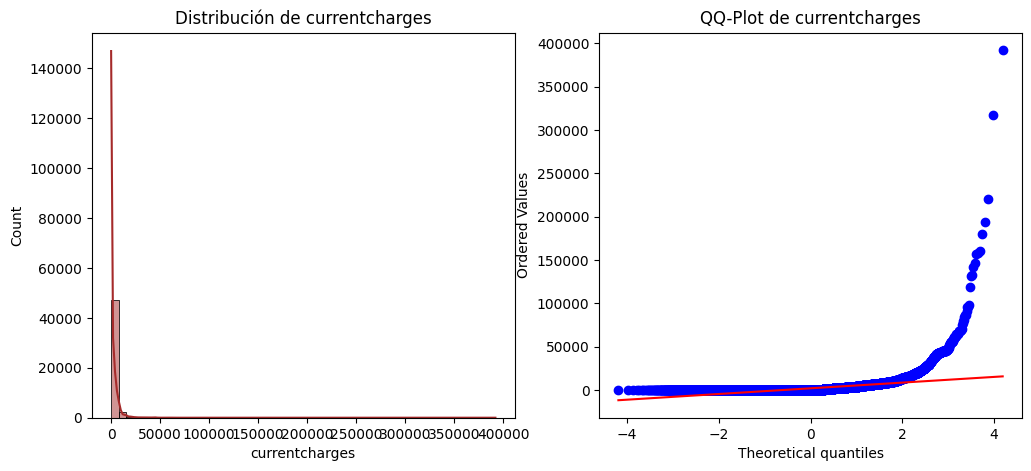


Pruebas de normalidad para la columna: currentcharges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 8113.05386
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


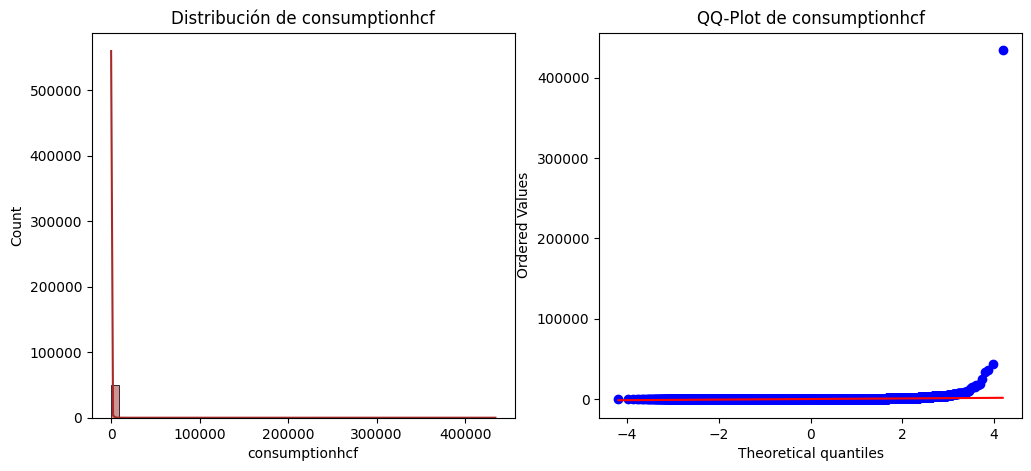


Pruebas de normalidad para la columna: consumptionhcf
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 14471.97155
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


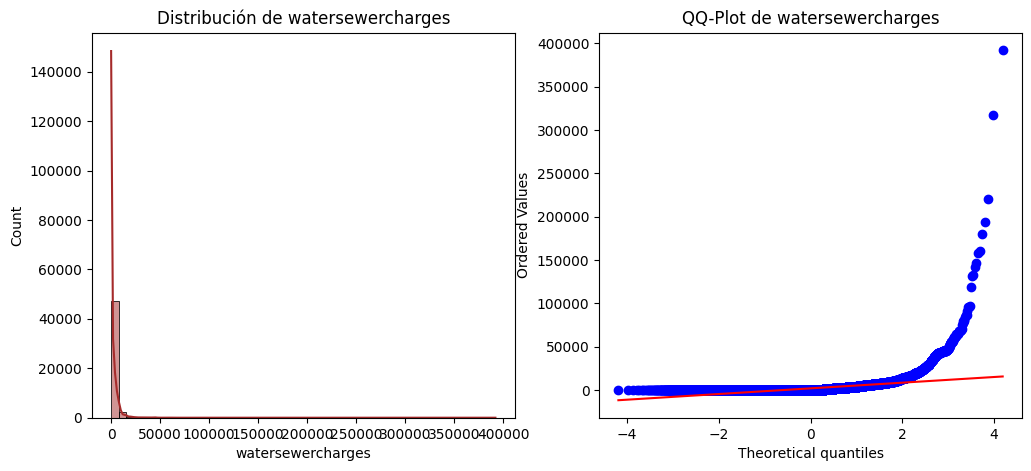


Pruebas de normalidad para la columna: watersewercharges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 8098.94044
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


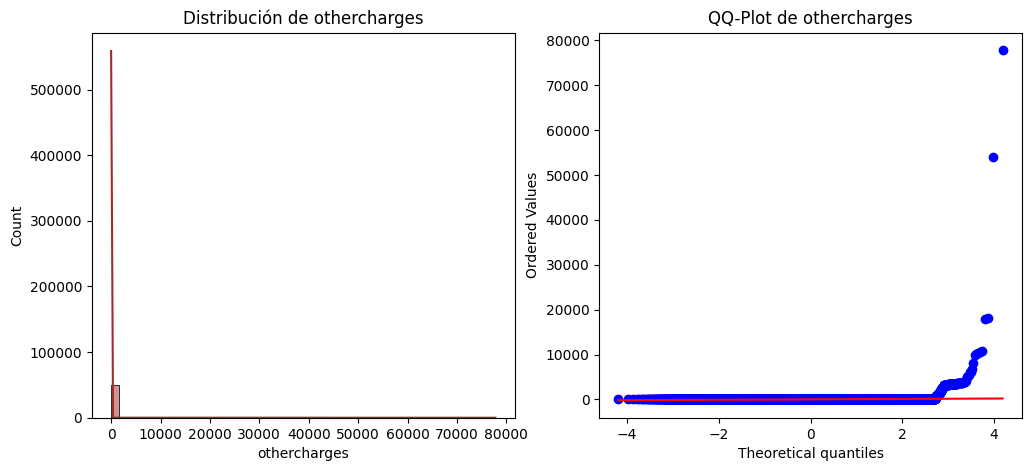


Pruebas de normalidad para la columna: othercharges
Shapiro-Wilk Test: p-valor = 0.00000
Kolmogorov-Smirnov Test: p-valor = 0.00000
Anderson-Darling Test: Estadístico = 18924.46034
  Al nivel de significancia 15.0%, los datos NO parecen normales.
  Al nivel de significancia 10.0%, los datos NO parecen normales.
  Al nivel de significancia 5.0%, los datos NO parecen normales.
  Al nivel de significancia 2.5%, los datos NO parecen normales.
  Al nivel de significancia 1.0%, los datos NO parecen normales.
D'Agostino-Pearson Test: p-valor = 0.00000


In [ ]:
for column in columnas_numericas:
    data = df[column]
    plot_distribution(data, column)
    normality_tests(data, column)

Adicional a los boxplots, se realizaron pruebas de normalidad a las variables númericas para revisar si los datos son normales. Según los resultados, mostraron que los datos no son normales no obstante se consideraron normales debido a que estos vienen así desde la fuente de datos y no son errores.

# **7. Análisis Predictivo**

**Predicción de la potabilidad del agua**

Para esta etapa del análisis predictivo, se empleó un conjunto de datos que contiene información sobre diversas sustancias presentes en el agua proveniente de fuentes de agua dulce. El conjunto incluye 9 atributos predictivos y 1 atributo objetivo, que indica si el agua es potable o no.

A continuación, se proporciona la URL de la fuente de donde se obtuvo el conjunto de datos:

https://www.kaggle.com/datasets/gauravduttakiit/water-potability-prediction/data

###***Preprocesamiento para Análisis Predictivo***

En esta fase del procesamiento, se comenzó a trabajar directamente con el conjunto de datos. El primer paso consistió en cargar el archivo CSV en un DataFrame para su posterior análisis.

In [14]:
dfpred = pd.read_csv('/content/drive/MyDrive/ProyectoProgramacion/train_dataset.csv', engine='python')

Se realizó la verificación del dataframe.

In [32]:
print(dfpred.head())

         ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  219.674262  22210.61308     5.875041  333.775777    398.517703   
1  6.783888  193.653581  13677.10644     5.171454  323.728663    477.854687   
2  8.072612  210.269780  16843.36393     8.793459  359.516169    559.167574   
3  4.227537  201.447487  13122.32958     6.932558  374.843538    402.660774   
4  7.080795  253.149651  12037.77039     4.384358  325.413248    422.389292   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       11.502316       112.412210   2.994259           0  
1       15.056064        66.396293   3.250022           0  
2       17.263576        68.738989   5.082206           0  
3       22.823293        76.469426   4.479628           0  
4       13.168299        40.052151   3.399945           0  


Se verificó el número de observaciones (filas) y variables (columnas).

In [16]:
print(f'Observaciones: {dfpred.shape[0]}', f'Variables: {dfpred.shape[1]}', sep='\n')

Observaciones: 1794
Variables: 10


En esta etapa se verificaron los tipos de datos de cada columna, así como la presencia de valores nulos. Este proceso permitió confirmar que el conjunto de datos era adecuado para continuar con las siguientes fases del análisis predictivo.

In [17]:
dfpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1794 entries, 0 to 1793
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               1794 non-null   float64
 1   Hardness         1794 non-null   float64
 2   Solids           1794 non-null   float64
 3   Chloramines      1794 non-null   float64
 4   Sulfate          1794 non-null   float64
 5   Conductivity     1794 non-null   float64
 6   Organic_carbon   1794 non-null   float64
 7   Trihalomethanes  1794 non-null   float64
 8   Turbidity        1794 non-null   float64
 9   Potability       1794 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 140.3 KB


Como se mencionó al inicio, la variable objetivo es la Potabilidad, la cual toma dos valores: 0, que indica que el agua no es potable, y 1, que indica que sí es potable. Para analizar la distribución de estas clases, se elaboró un gráfico de barras.

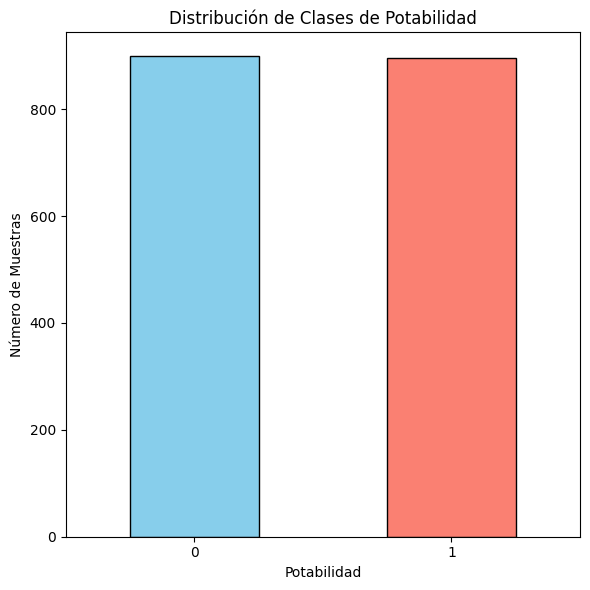

In [31]:
distribucion = dfpred['Potability'].value_counts()

plt.figure(figsize=(6, 6))
distribucion.plot(kind='bar', color=['skyblue', 'salmon'], width=0.5, linewidth=1.0, edgecolor='black')
plt.xlabel('Potabilidad')
plt.ylabel('Número de Muestras')
plt.title('Distribución de Clases de Potabilidad')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

###***Modelado Predictivo***

En esta siguiente fase se empezó a trabajar con la parte predictiva, enfocándose en la construcción, entrenamiento y evaluación de un modelo para predecir la potabilidad del agua a partir de sus características fisicoquímicas.

**Modelo elegido y parámetros**

El modelo elegido fue el Árbol de Decisión debido a que es fácil de interpretarlo, no requiere como tal una normalización en los datos y sobre todo, permite trabajar con variables numéricas y categóricas.

Como primer paso, se definió la variable X para los atributos predictivos y la variables Y para el atributo objetivo.

In [19]:
X = dfpred.drop('Potability', axis=1)
y = dfpred['Potability']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

En este paso se declaró al clasificador junnto con la medida de impureza el índice Gini y la profundidad máxima.

In [21]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)

**Entrenamiento y Evaluación**

En este fase se empezó con el entrenamiento del modelo.

In [22]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Aquí se inicio con la predicción junto con la generación de un reporte para entender el comportamiento de la metricas junto con los proemdios.

Adicional a esto, se calculó la matriz de confusión.

In [37]:
y_pred = clf.predict(X_test)
print("Reporte")
print('\n')
print(classification_report(y_test, y_pred))
print('\n')
print("Matriz de confusión")
print('\n')
print(confusion_matrix(y_test, y_pred))

Reporte


              precision    recall  f1-score   support

           0       0.53      0.91      0.67       268
           1       0.68      0.20      0.30       271

    accuracy                           0.55       539
   macro avg       0.60      0.55      0.49       539
weighted avg       0.60      0.55      0.48       539



Matriz de confusión


[[243  25]
 [218  53]]


###**Resultados**

En esta fase de resultados, se mostró la matriz de confusión junto con el árbol de decisión, lo que permitió evaluar el desempeño del modelo en términos de precisión, sensibilidad y especificidad.

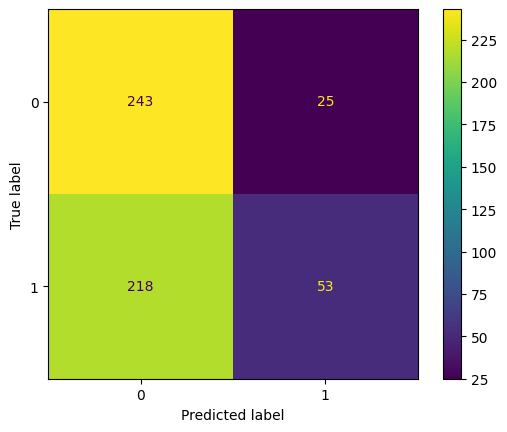

In [24]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Dentro de la matriz de confusión, se mostró que el modelo tiene una alta precisión para identificar el agua no potable (clase 0), pero tiene dificultades para identificar correctamente el agua potable (clase 1), lo que se refleja en un número elevado de falsos negativos.

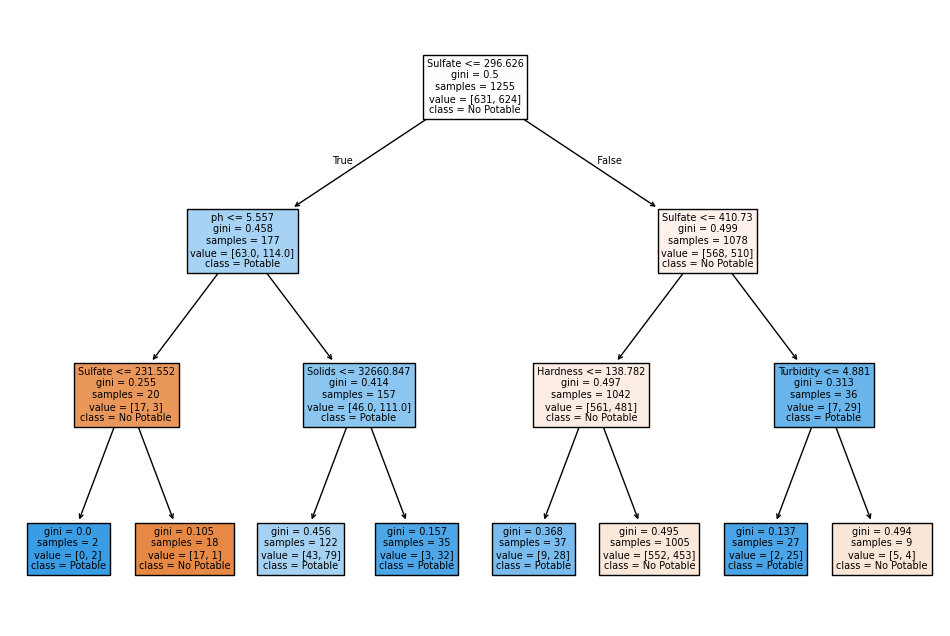

In [25]:
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Potable', 'Potable'])
plt.show()

El Árbol de Decisión tiene un rendimiento moderado para clasificar la potabilidad del agua, con una precisión y recall aceptables para la clase No Potable y algo más bajos para la clase Potable0. La visualización del árbol nos permite entender las reglas de decisión aprendidas por el modelo, identificando las características y umbrales que son más importantes para la clasificación dentro de las limitaciones de la profundidad definida.

In [30]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

depths = [2, 4, 6, 8, 10]
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

for d in depths:
    clf_cv = DecisionTreeClassifier(criterion='entropy',max_depth=d, random_state=42)

    results = cross_validate(clf_cv, X, y, cv=skf, scoring=scoring)

    print(f"Profundidad: {d}")
    print("Resultados:")

    for metric in scoring:
      print(f"{metric}: {results['test_' + metric].mean():.4f}")
    print('\n')

Profundidad: 2
Resultados:
accuracy: 0.5407
precision_macro: 0.6362
recall_macro: 0.5398
f1_macro: 0.4460


Profundidad: 4
Resultados:
accuracy: 0.5479
precision_macro: 0.5866
recall_macro: 0.5473
f1_macro: 0.4979


Profundidad: 6
Resultados:
accuracy: 0.5574
precision_macro: 0.5813
recall_macro: 0.5569
f1_macro: 0.5209


Profundidad: 8
Resultados:
accuracy: 0.5780
precision_macro: 0.5833
recall_macro: 0.5779
f1_macro: 0.5709


Profundidad: 10
Resultados:
accuracy: 0.5758
precision_macro: 0.5843
recall_macro: 0.5756
f1_macro: 0.5645




Además, se realizaron una serie de pruebas con distintas metricas y profundidades, esto para observar el cambio del rendimiento según la profundidades.

# **8. Conclusiones y Trabajos Futuros**

**Resumen del trabajo realizado**

Este informe detalla el análisis del consumo y costo del agua en Nueva York utilizando datos de NYC Open Data. Inicialmente, se realizó una fase de limpieza y transformación de datos, que incluyó la eliminación de columnas irrelevantes, la normalización de nombres de columnas, la corrección de tipos de datos, el manejo de valores nulos y la identificación y tratamiento de valores atípicos mediante winsorización.

Posteriormente, se llevó a cabo un análisis descriptivo para comprender la estructura y características de los datos, incluyendo la identificación del número de observaciones y variables, los tipos de datos, la presencia de valores nulos, estadísticas descriptivas para variables numéricas y la visualización de distribuciones y correlaciones.

La siguiente fase consistió en un análisis exploratorio para responder preguntas específicas sobre el consumo y costo del agua, analizando tendencias a lo largo del tiempo, porcentaje por categoría de usuario, y distribución por desarrollo y municipio. También se examinó la relación entre el consumo y el costo, y se realizaron pruebas adicionales para identificar valores atípicos y evaluar la normalidad de los datos.

Finalmente, se realizó un análisis predictivo utilizando un conjunto de datos diferente sobre la potabilidad del agua. Se cargó el conjunto de datos, se verificó su estructura y se preparó para el modelado. Se eligió un modelo de Árbol de Decisión para predecir la potabilidad, se entrenó el modelo y se evaluó su rendimiento utilizando un reporte de clasificación y una matriz de confusión. Se visualizó el árbol de decisión y se realizaron pruebas con validación cruzada para evaluar el rendimiento del modelo con diferentes profundidades.

**Hallazgos**

*   El análisis descriptivo reveló una gran variabilidad en los datos numéricos y diversas distribuciones en las variables categóricas y de fecha.

*   El análisis exploratorio identificó tendencias en el consumo y costo del agua a lo largo del tiempo, con variaciones notables en diferentes períodos.

*   Existe una fuerte correlación entre el consumo y el costo del agua, aunque se observaron algunos valores que se desviaron de esta tendencia.

*   El modelo de Árbol de Decisión mostró un rendimiento moderado en la predicción de la potabilidad del agua, con un mejor desempeño en la identificación de agua no potable.

**Posibles mejoras**

*   Explorar modelos predictivos alternativos para la predicción de la potabilidad del agua, como bosques aleatorios, máquinas de vectores de soporte o redes neuronales, para comparar su rendimiento y posiblemente mejorar la precisión, especialmente para la clase Potable.

*   Aplicar técnicas de series temporales al conjunto de datos de consumo y costo del agua para pronosticar el consumo y los costos futuros, lo que podría ser valioso para la planificación y gestión de recursos hídricos.

*   Realizar un análisis geoespacial del consumo y costo del agua para identificar patrones y anomalías basados en la ubicación geográfica, lo que podría proporcionar información adicional para la optimización de la distribución y tarificación.

*   Integrar datos adicionales relevantes, como factores socioeconómicos, condiciones climáticas o información sobre la infraestructura hídrica, para enriquecer el análisis y potencialmente mejorar la precisión de los modelos predictivos.